## Privacy Policies Classification
### Author: Valentina Chacon Buitrago

##### Imports

In [57]:
import os
from os import listdir
from os.path import abspath, isfile, join
import numpy as np
import re
from sklearn.datasets import load_files
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import pickle
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from statistics import mean
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Valentina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Valentina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### Import Dataset

In [8]:
page_data = load_files(os.path.abspath('privacy_policies'))
x,y = page_data.data, page_data.target

##### Text Preprocessing

In [9]:
stemmer = WordNetLemmatizer()
documents = []

for i in range(len(x)):
    
    # Remove all break line characters
    document = str(x[i], 'mac_roman')
    document = document.replace('\r', ' ').replace('\n', ' ')

    # Remove all the special characters
    document = re.sub(r'\W', ' ', document)
    
    # Remove all single characters 
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Remove all numbers
    document = re.sub(r'\d+', '', document)
   
    # Substitute multiple spaces with a single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Convert document to lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

##### Classifiers

In [107]:
classifiers = {
    'random_forest': RandomForestClassifier,
    'SGD': SGDClassifier,
    'k_neighbors': KNeighborsClassifier,
    'gaussian_process': GaussianProcessClassifier}

### Experiment 1. Modify single parameters with the default configuration of each classifier
Classifiers being tested are:
- Random Forest
- SGD
- K Neighbors
- Gaussian Process

#### 1.1 Modify just the parameter max_features

In [147]:
data = {}

features = [10,100,200,300,500,800,1000,1200,2000,5000]

#Step 1: set experiment configuration as dataframe index
for num in features:
    #Add configuration to data_frame
    column_name = 'num_features_'+str(num)
    if not 'configuration' in data:
        data['configuration'] = []
    data['configuration'].append(column_name)
    
    
#Step 2: find data
for name_classifier in classifiers:    
    print(data)
    print ('----------------------------------')
    print ('Classifier: ' + name_classifier)
    classifier = classifiers[name_classifier]()
    
        
    for num in features:
    
        #List meant to store all values for the same configuration
        list_num = []
            
        for i in range(30):
            # Convert text to numbers and find TFIDF
            tfidfconverter = TfidfVectorizer(max_features=num, stop_words=stopwords.words('english'))
            x = tfidfconverter.fit_transform(documents).toarray()

            # Select training and testing sets
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

            # Train the classification model
            classifier.fit(x_train, y_train)
            y_pred = classifier.predict(x_test)

            # Evaluate the model 
            accuracy = accuracy_score(y_test, y_pred)
            #print('features ' + str(num))
            #print(confusion_matrix(y_test,y_pred))
            #print(classification_report(y_test,y_pred))
            #print(accuracy)
            
            #Add accuracy to the list of values
            list_num.append(accuracy)
            
        print(num)
        print(list_num)
        
        #Add data to column
        if not name_classifier in data:
            data[name_classifier] = []
        data[name_classifier].append(mean(list_num))
                      
df_1 = pd.DataFrame(data)
print(df_1)

{'configuration': ['num_features_10', 'num_features_100', 'num_features_200', 'num_features_300', 'num_features_500', 'num_features_800', 'num_features_1000', 'num_features_1200', 'num_features_2000', 'num_features_5000']}
----------------------------------
Classifier: random_forest
10
[0.6666666666666666, 0.7058823529411765, 0.7450980392156863, 0.7058823529411765, 0.7254901960784313, 0.6666666666666666, 0.7254901960784313, 0.6862745098039216, 0.6862745098039216, 0.6470588235294118, 0.7058823529411765, 0.7254901960784313, 0.6862745098039216, 0.6862745098039216, 0.7450980392156863, 0.6862745098039216, 0.6862745098039216, 0.6666666666666666, 0.6862745098039216, 0.7058823529411765, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.7058823529411765, 0.6862745098039216, 0.6666666666666666, 0.7254901960784313, 0.6862745098039216, 0.7058823529411765]
100
[0.7450980392156863, 0.7843137254901961, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.803921

300
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.7450980392156863, 0.7647058823529411, 0.8235294117647058, 0.8431372549019608, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.8823529411764706, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.7843137254901961, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.803921568627451]
500
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.8627450980392157, 0.8431372549019608, 0.7843137254901961, 0.8235294117647058, 0.7843137254901961, 0.8431372549019608, 0.8627450980392157, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 

1000
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
1200
[0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.862745

5000
[0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216]
       configuration  random_forest       SGD  k_neighbors  gaussian_process
0    num_features_10       0.695425  0.664052     0.745098          0.705882
1   num_features_100       0.771242  0.780392     0.823529          0.803922
2   num_features_200       0.762092  0.809804     0.823529          0.803922
3   num_features_300       0.763399  0.814379     0.862745          0.784314
4   num_f

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

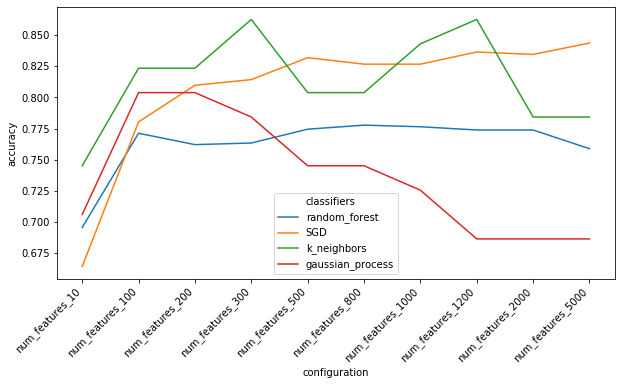

In [149]:
plt.figure(figsize=(10,5))
dt_1 = df_1.melt('configuration', var_name='classifiers', value_name='accuracy')
g = sns.lineplot(x='configuration',y='accuracy',hue='classifiers',data=dt_1, sort=False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

#### 1.2 Modify just the parameter min_df
min_df is used for removing terms that appear too infrequently.

##### 1.2.1  Number of documents
- min_df = 5 means "ignore terms that appear in less than 5 documents".
- The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

In [150]:
data = {}

df_min = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140]

#Step 1: set experiment configuration as dataframe index
for num in df_min:
    #Add configuration to data_frame
    column_name = 'df_min_'+str(num)
    if not 'configuration' in data:
        data['configuration'] = []
    data['configuration'].append(column_name)
    
    
#Step 2: find data
for name_classifier in classifiers:    
    print(data)
    print ('----------------------------------')
    print ('Classifier: ' + name_classifier)
    classifier = classifiers[name_classifier]()
    
        
    for num in df_min:
        
        #TODO: can be replaced by a variable if we only care about mean
        #List meant to store all values for the same configuration
        list_num = []
            
        #TODO: Determine the number of repetitions per configuration, should we store the mean or median?
        for i in range(30):
            # Convert text to numbers and find TFIDF
            tfidfconverter = TfidfVectorizer(min_df=num, stop_words=stopwords.words('english'))
            x = tfidfconverter.fit_transform(documents).toarray()

            # TODO: Should the division be random or the same number to make it reproducible?
            # Select training and testing sets
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

            # Train the classification model
            classifier.fit(x_train, y_train)
            y_pred = classifier.predict(x_test)

            # Evaluate the model 
            accuracy = accuracy_score(y_test, y_pred)
            #print('min_df ' + str(num))
            #print(confusion_matrix(y_test,y_pred))
            #print(classification_report(y_test,y_pred))
            #print(accuracy)
            
            #Add accuracy to the list of values
            list_num.append(accuracy)
            
        print(num)
        print(list_num)
        
        #Add data to column
        if not name_classifier in data:
            data[name_classifier] = []
        data[name_classifier].append(mean(list_num))
                      
df_2 = pd.DataFrame(data)
print(df_2)

{'configuration': ['df_min_1', 'df_min_10', 'df_min_20', 'df_min_30', 'df_min_40', 'df_min_50', 'df_min_60', 'df_min_70', 'df_min_80', 'df_min_90', 'df_min_100', 'df_min_110', 'df_min_120', 'df_min_130', 'df_min_140']}
----------------------------------
Classifier: random_forest
1
[0.7254901960784313, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.7843137254901961, 0.7254901960784313, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313, 0.7058823529411765, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313]
10
[0.7647058823529411, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.764705882352

140
[0.7058823529411765, 0.6470588235294118, 0.6862745098039216, 0.7450980392156863, 0.7647058823529411, 0.7058823529411765, 0.6862745098039216, 0.7254901960784313, 0.6862745098039216, 0.7058823529411765, 0.7058823529411765, 0.6862745098039216, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.7254901960784313, 0.7058823529411765, 0.7058823529411765, 0.7254901960784313, 0.7647058823529411, 0.7647058823529411, 0.7254901960784313, 0.6862745098039216, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.6862745098039216]
{'configuration': ['df_min_1', 'df_min_10', 'df_min_20', 'df_min_30', 'df_min_40', 'df_min_50', 'df_min_60', 'df_min_70', 'df_min_80', 'df_min_90', 'df_min_100', 'df_min_110', 'df_min_120', 'df_min_130', 'df_min_140'], 'random_forest': [0.7450980392156863, 0.777124183006536, 0.7784313725490196, 0.7758169934640523, 0.7712418300653595, 0.7718954248366013, 0.7620915032679738, 0.7549019607843137,

120
[0.7058823529411765, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.7843137254901961, 0.8627450980392157, 0.8235294117647058, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.8235294117647058, 0.8627450980392157, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.7843137254901961, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.8431372549019608, 0.7647058823529411, 0.8235294117647058, 0.7843137254901961, 0.8627450980392157, 0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.8431372549019608]
130
[0.8431372549019608, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.803921568627451, 0.803921568627451, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.7058823529411765, 0.8431372549019608, 0.7058823529411765, 0.7254901960784313, 0.7058823529411765, 0.7647058823529411, 0.745098039215686

100
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961]
110
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.82352941

70
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411]
80
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

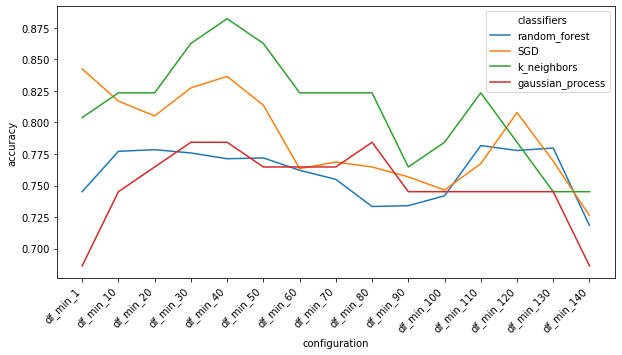

In [151]:
plt.figure(figsize=(10,5))
dt_2 = df_2.melt('configuration', var_name='classifiers', value_name='accuracy')
g = sns.lineplot(x='configuration',y='accuracy',hue='classifiers',data=dt_2, sort=False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

##### 1.2.2 Percentage of documents
- min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".

In [152]:
data = {}

df_min = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#Step 1: set experiment configuration as dataframe index
for num in df_min:
    #Add configuration to data_frame
    column_name = 'df_min_'+str(num)
    if not 'configuration' in data:
        data['configuration'] = []
    data['configuration'].append(column_name)
    
    
#Step 2: find data
for name_classifier in classifiers:    
    print(data)
    print ('----------------------------------')
    print ('Classifier: ' + name_classifier)
    classifier = classifiers[name_classifier]()
    
        
    for num in df_min:
        
        #TODO: can be replaced by a variable if we only care about mean
        #List meant to store all values for the same configuration
        list_num = []
            
        #TODO: Determine the number of repetitions per configuration, should we store the mean or median?
        for i in range(30):
            # Convert text to numbers and find TFIDF
            tfidfconverter = TfidfVectorizer(min_df=num, stop_words=stopwords.words('english'))
            x = tfidfconverter.fit_transform(documents).toarray()

            # TODO: Should the division be random or the same number to make it reproducible?
            # Select training and testing sets
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

            # Train the classification model
            classifier.fit(x_train, y_train)
            y_pred = classifier.predict(x_test)

            # Evaluate the model 
            accuracy = accuracy_score(y_test, y_pred)
            #print('min_df ' + str(num))
            #print(confusion_matrix(y_test,y_pred))
            #print(classification_report(y_test,y_pred))
            #print(accuracy)
            
            #Add accuracy to the list of values
            list_num.append(accuracy)
            
        print(num)
        print(list_num)
        
        #Add data to column
        if not name_classifier in data:
            data[name_classifier] = []
        data[name_classifier].append(mean(list_num))
                      
df_3 = pd.DataFrame(data)
print(df_3)

{'configuration': ['df_min_0.1', 'df_min_0.2', 'df_min_0.3', 'df_min_0.4', 'df_min_0.5', 'df_min_0.6', 'df_min_0.7', 'df_min_0.8', 'df_min_0.9']}
----------------------------------
Classifier: random_forest
0.1
[0.7647058823529411, 0.803921568627451, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.803921568627451, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961]
0.2
[0.7254901960784313, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.784313

0.5
[0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.803921568627451, 0.803921568627451, 0.7450980392156863, 0.803921568627451, 0.7647058823529411, 0.7254901960784313, 0.7254901960784313, 0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.7254901960784313, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.6470588235294118, 0.7254901960784313, 0.7058823529411765, 0.803921568627451, 0.803921568627451, 0.7450980392156863, 0.7647058823529411, 0.6274509803921569, 0.803921568627451, 0.7254901960784313, 0.7647058823529411, 0.803921568627451, 0.7647058823529411]
0.6
[0.7450980392156863, 0.7647058823529411, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.6862745098039216, 0.7647058823529411, 0.803921568627451, 0.7254901960784313, 0.803921568627451, 0.7254901960784313, 0.7843137254901961, 0.7254901960784313, 0.7254901960784313, 0.7058823529411765, 0.803921568627451, 0.7647058823529411, 0.7254901960784313, 0.7058823529411765, 0.62

0.9
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863]
{'configuration': ['df_min_0.1', 'df_min_0.2', 'df_min_0.3', 'df_min_0.4', 'df_min_0.5', 'df_min_0.6', 'df_min_0.7', 'df_min_0.8', 'df_min_0.9'], 'random_forest': [0.7692810457516339, 0.7686274509803921, 0.7673202614379084, 0.7470588235294118, 0.7542483660130719, 0.7352941176470589, 0.7784313725490196, 0.7352941176470589, 0.742483660130719], 'SGD': [0.8209150326797385, 0.8359477124183007, 0.8

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

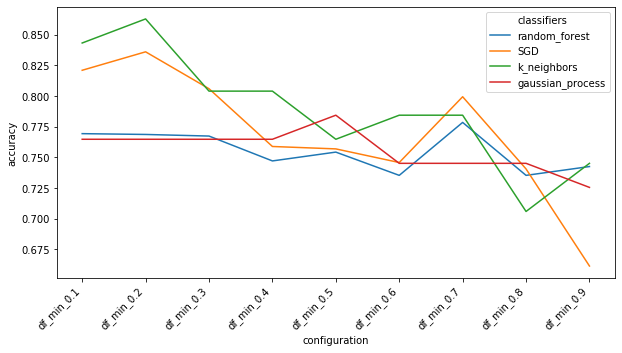

In [153]:
plt.figure(figsize=(10,5))
dt_3 = df_3.melt('configuration', var_name='classifiers', value_name='accuracy')
g = sns.lineplot(x='configuration',y='accuracy',hue='classifiers',data=dt_3, sort=False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

#### 1.3 Modify just the parameter max_df
max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words.

##### 1.3.1  Number of documents
- max_df = 25 means "ignore terms that appear in more than 25 documents".

In [154]:
data = {}

df_max = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140]

#Step 1: set experiment configuration as dataframe index
for num in df_max:
    #Add configuration to data_frame
    column_name = 'df_max_'+str(num)
    if not 'configuration' in data:
        data['configuration'] = []
    data['configuration'].append(column_name)
    
    
#Step 2: find data
for name_classifier in classifiers:    
    print(data)
    print ('----------------------------------')
    print ('Classifier: ' + name_classifier)
    classifier = classifiers[name_classifier]()
    
        
    for num in df_max:
        
        #TODO: can be replaced by a variable if we only care about mean
        #List meant to store all values for the same configuration
        list_num = []
            
        #TODO: Determine the number of repetitions per configuration, should we store the mean or median?
        for i in range(30):
            # Convert text to numbers and find TFIDF
            tfidfconverter = TfidfVectorizer(max_df=num, stop_words=stopwords.words('english'))
            x = tfidfconverter.fit_transform(documents).toarray()

            # TODO: Should the division be random or the same number to make it reproducible?
            # Select training and testing sets
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

            # Train the classification model
            classifier.fit(x_train, y_train)
            y_pred = classifier.predict(x_test)

            # Evaluate the model 
            accuracy = accuracy_score(y_test, y_pred)
            #print('max_df ' + str(num))
            #print(confusion_matrix(y_test,y_pred))
            #print(classification_report(y_test,y_pred))
            #print(accuracy)
            
            #Add accuracy to the list of values
            list_num.append(accuracy)
            
        print(num)
        print(list_num)
        
        #Add data to column
        if not name_classifier in data:
            data[name_classifier] = []
        data[name_classifier].append(mean(list_num))
                      
df_4 = pd.DataFrame(data)
print(df_4)

{'configuration': ['df_max_1', 'df_max_10', 'df_max_20', 'df_max_30', 'df_max_40', 'df_max_50', 'df_max_60', 'df_max_70', 'df_max_80', 'df_max_90', 'df_max_100', 'df_max_110', 'df_max_120', 'df_max_130', 'df_max_140']}
----------------------------------
Classifier: random_forest
1
[0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786]
10
[0.5686274509803921, 0.5882352941176471, 0.5882352941176471, 0.6274509803921569, 0.5

140
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411]
{'configuration': ['df_max_1', 'df_max_10', 'df_max_20', 'df_max_30', 'df_max_40', 'df_max_50', 'df_max_60', 'df_max_70', 'df_max_80', 'df_max_90', 'df_max_100', 'df_max_110', 'df_max_120', 'df_max_130', 'df_max_140'], 'random_forest': [0.43137254901960786, 0.5980392156862745, 0.7045751633986929, 0.7091503267973857, 0.726797385620915, 0.7339869281045751, 0.738562091503268, 0.7261437908496732,

120
[0.8823529411764706, 0.8431372549019608, 0.8431372549019608, 0.8823529411764706, 0.8431372549019608, 0.8431372549019608, 0.8823529411764706, 0.8431372549019608, 0.9019607843137255, 0.8627450980392157, 0.8627450980392157, 0.8823529411764706, 0.8823529411764706, 0.8627450980392157, 0.8823529411764706, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.9019607843137255, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8431372549019608, 0.8627450980392157, 0.8235294117647058, 0.8627450980392157, 0.8431372549019608, 0.8823529411764706, 0.8627450980392157, 0.8627450980392157]
130
[0.9019607843137255, 0.8823529411764706, 0.8823529411764706, 0.8627450980392157, 0.8823529411764706, 0.9019607843137255, 0.8823529411764706, 0.8431372549019608, 0.8627450980392157, 0.9019607843137255, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8627450980392157, 0.9019607843137255, 0.9411764705882353, 0.8627450980392157, 0.8627450980392157, 0.9019607843137255, 0.86274509

100
[0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255]
110
[0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.86274509

70
[0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216]
80
[0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

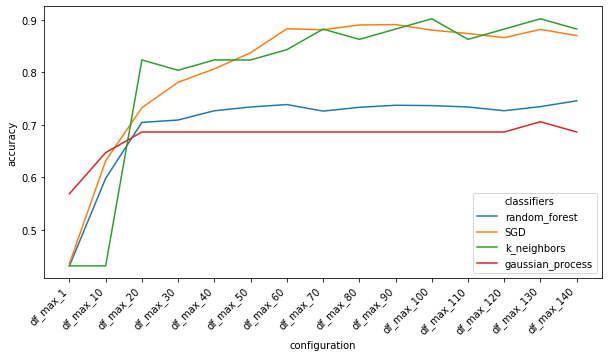

In [155]:
plt.figure(figsize=(10,5))
dt_4 = df_4.melt('configuration', var_name='classifiers', value_name='accuracy')
g = sns.lineplot(x='configuration',y='accuracy',hue='classifiers',data=dt_4, sort=False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

##### 1.3.2 Percentage of documents
- max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
- The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.

In [156]:
data = {}

df_max = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#Step 1: set experiment configuration as dataframe index
for num in df_max:
    #Add configuration to data_frame
    column_name = 'df_max_'+str(num)
    if not 'configuration' in data:
        data['configuration'] = []
    data['configuration'].append(column_name)
    
    
#Step 2: find data
for name_classifier in classifiers:    
    print(data)
    print ('----------------------------------')
    print ('Classifier: ' + name_classifier)
    classifier = classifiers[name_classifier]()
    
        
    for num in df_max:
        
        #TODO: can be replaced by a variable if we only care about mean
        #List meant to store all values for the same configuration
        list_num = []
            
        #TODO: Determine the number of repetitions per configuration, should we store the mean or median?
        for i in range(30):
            # Convert text to numbers and find TFIDF
            tfidfconverter = TfidfVectorizer(max_df=num, stop_words=stopwords.words('english'))
            x = tfidfconverter.fit_transform(documents).toarray()

            # TODO: Should the division be random or the same number to make it reproducible?
            # Select training and testing sets
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

            # Train the classification model
            classifier.fit(x_train, y_train)
            y_pred = classifier.predict(x_test)

            # Evaluate the model 
            accuracy = accuracy_score(y_test, y_pred)
            #print('max_df ' + str(num))
            #print(confusion_matrix(y_test,y_pred))
            #print(classification_report(y_test,y_pred))
            #print(accuracy)
            
            #Add accuracy to the list of values
            list_num.append(accuracy)
            
        print(num)
        print(list_num)
        
        #Add data to column
        if not name_classifier in data:
            data[name_classifier] = []
        data[name_classifier].append(mean(list_num))
                      
df_5 = pd.DataFrame(data)
print(df_5)

{'configuration': ['df_max_0.1', 'df_max_0.2', 'df_max_0.3', 'df_max_0.4', 'df_max_0.5', 'df_max_0.6', 'df_max_0.7', 'df_max_0.8', 'df_max_0.9']}
----------------------------------
Classifier: random_forest
0.1
[0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765]
0.2
[0.7058823529411765, 0.7254901960784313, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7

0.5
[0.9019607843137255, 0.8627450980392157, 0.9019607843137255, 0.9215686274509803, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9215686274509803, 0.9019607843137255, 0.8823529411764706, 0.9215686274509803, 0.9019607843137255, 0.8823529411764706, 0.9215686274509803, 0.9215686274509803, 0.9215686274509803, 0.9215686274509803, 0.8823529411764706, 0.8627450980392157, 0.9019607843137255, 0.9215686274509803, 0.9215686274509803, 0.8823529411764706, 0.9215686274509803, 0.9215686274509803, 0.9019607843137255, 0.9215686274509803, 0.8431372549019608, 0.9411764705882353, 0.9019607843137255]
0.6
[0.8431372549019608, 0.8823529411764706, 0.9215686274509803, 0.9019607843137255, 0.9411764705882353, 0.9019607843137255, 0.8431372549019608, 0.8627450980392157, 0.8627450980392157, 0.9019607843137255, 0.9019607843137255, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.9019607843137255, 0.8627450980392157, 0.9215686274509803, 0.9019607843137255, 0.9019607843137255, 0.86274509

0.9
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
{'configuration': ['df_max_0.1', 'df_max_0.2', 'df_max_0.3', 'df_max_0.4', 'df_max_0.5', 'df_max_0.6', 'df_max_0.7', 'df_max_0.8', 'df_max_0.9'], 'random_forest': [0.7058823529411765, 0.7098039215686275, 0.7326797385620915, 0.7320261437908496, 0.7352941176470589, 0.7405228758169935, 0.730718954248366, 0.7379084967320262, 0.742483660130719], 'SGD': [0.7418300653594772, 0.7875816993464052, 0.83

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

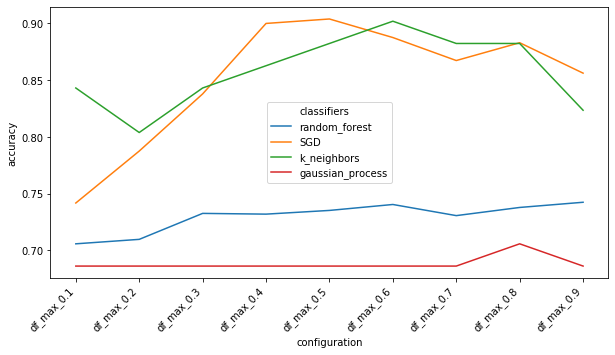

In [157]:
plt.figure(figsize=(10,5))
dt_5 = df_5.melt('configuration', var_name='classifiers', value_name='accuracy')
g = sns.lineplot(x='configuration',y='accuracy',hue='classifiers',data=dt_5, sort=False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

### Experiment 2. Combine multiple parameters with the default configuration of each classifier

#### 2.1 Modify the parameter max_features, number of documents in min_df and number of documents in max_df

In [36]:
features = [10,100,200,300,500,800,1000,1200,2000,5000]
df = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140]

for classifier in classifiers:
    
    print ('----------------------------------')
    print ('Classifier: ' + classifier)
    classifier = classifiers[classifier]()
    
    #TODO: Determine the number of repetitions per configuration
    for i in range(1): 
        for num in features:
            for min_df in df:
                for max_df in df:
                    
                    try:
                        # Convert text to numbers and find TFIDF
                        tfidfconverter = TfidfVectorizer(max_features=num, min_df=min_df, max_df=max_df, stop_words=stopwords.words('english'))
                        x = tfidfconverter.fit_transform(documents).toarray()

                        # Select training and testing sets
                        # TODO: Should the division be random or the same number to make it reproducible?
                        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

                        # Train the classification model
                        classifier.fit(x_train, y_train)
                        y_pred = classifier.predict(x_test)
                        
                        # Evaluate the model 
                        print('max_features ' + str(num))
                        print('min_df: ' +  str(min_df))
                        print('max_df: ' +  str(max_df))
                        print(confusion_matrix(y_test,y_pred))
                        print(classification_report(y_test,y_pred))
                        print(accuracy_score(y_test, y_pred))
                        
                    except Exception:
                        print('There was an error')
                        print('max_features ' + str(num))
                        print('min_df: ' +  str(min_df))
                        print('max_df: ' +  str(max_df))
                
                        

----------------------------------
Classifier: Random Forest
max_features 10
min_df: 1
max_df: 1
[[29  0]
 [22  0]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        29
           1       0.00      0.00      0.00        22

    accuracy                           0.57        51
   macro avg       0.28      0.50      0.36        51
weighted avg       0.32      0.57      0.41        51

0.5686274509803921


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_features 10
min_df: 1
max_df: 10
[[28  1]
 [22  0]]
              precision    recall  f1-score   support

           0       0.56      0.97      0.71        29
           1       0.00      0.00      0.00        22

    accuracy                           0.55        51
   macro avg       0.28      0.48      0.35        51
weighted avg       0.32      0.55      0.40        51

0.5490196078431373
max_features 10
min_df: 1
max_df: 20
[[10 19]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.91      0.34      0.50        29
           1       0.53      0.95      0.68        22

    accuracy                           0.61        51
   macro avg       0.72      0.65      0.59        51
weighted avg       0.74      0.61      0.58        51

0.6078431372549019
max_features 10
min_df: 1
max_df: 30
[[11 18]
 [ 6 16]]
              precision    recall  f1-score   support

           0       0.65      0.38      0.48        29
           1       0.47      0.

max_features 10
min_df: 10
max_df: 80
[[23  6]
 [ 7 15]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.71      0.68      0.70        22

    accuracy                           0.75        51
   macro avg       0.74      0.74      0.74        51
weighted avg       0.74      0.75      0.74        51

0.7450980392156863
max_features 10
min_df: 10
max_df: 90
[[26  3]
 [ 7 15]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.83      0.68      0.75        22

    accuracy                           0.80        51
   macro avg       0.81      0.79      0.79        51
weighted avg       0.81      0.80      0.80        51

0.803921568627451
max_features 10
min_df: 10
max_df: 100
[[24  5]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.74     

max_features 10
min_df: 30
max_df: 40
[[23  6]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.68      0.59      0.63        22

    accuracy                           0.71        51
   macro avg       0.70      0.69      0.69        51
weighted avg       0.70      0.71      0.70        51

0.7058823529411765
max_features 10
min_df: 30
max_df: 50
[[19 10]
 [ 6 16]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        29
           1       0.62      0.73      0.67        22

    accuracy                           0.69        51
   macro avg       0.69      0.69      0.69        51
weighted avg       0.70      0.69      0.69        51

0.6862745098039216
max_features 10
min_df: 30
max_df: 60
[[22  7]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.67     

max_features 10
min_df: 40
max_df: 140
[[26  3]
 [10 12]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.80      0.55      0.65        22

    accuracy                           0.75        51
   macro avg       0.76      0.72      0.72        51
weighted avg       0.76      0.75      0.73        51

0.7450980392156863
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 10
min_df: 50
max_df: 50
[[20  9]
 [10 12]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        29
           1       0.57      0.55      0.56        22

    accuracy                           0.63        51
   macro avg       0.62      0.62      0.62        51
weighted avg       0.63      0.63      0.63        51

0.6274509803921569
max_features 10
min_df: 50
max_df: 60
[[25  4]
 [11 11]]
              precision    recall  f1-sco

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 10
min_df: 70
max_df: 70
[[28  1]
 [13  9]]
              precision    recall  f1-score   support

           0       0.68      0.97      0.80        29
           1       0.90      0.41      0.56        22

    accuracy                           0.73        51
   macro avg       0.79      0.69      0.68        51
weighted avg       0.78      0.73      0.70        51

0.7254901960784313
max_features 10
min_df: 70
max_df: 80
[[21  8]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.62      0.59      0.60        22

    accuracy                           0.67        51
   macro avg       0.66      0.66      0.66        51
weighted avg       0.67      0.67      0.67        51

0.6666666666666666
max_features 10
min_df: 70
max_df: 90
[[27  2]
 [10 12]]
    

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 10
min_df: 100
max_df: 100
[[19 10]
 [14  8]]
              precision    recall  f1-score   support

           0       0.58      0.66      0.61        29
           1       0.44      0.36      0.40        22

    accuracy                           0.53        51
   macro avg       0.51      0.51      0.51        51
weighted avg       0.52      0.53      0.52        51

0.5294117647058824
max_features 10
min_df: 100
max_df: 110
[[21  8]
 [11 11]]
              precision    recall  f1-score   support

           0       0.66      0.72      0.69        29
           1       0.58      0.50      0.54        22

    accuracy                           0.63        51
   macro avg       0.62      0.61      0.61        51
weighted avg       0.62      0.63      0.62        51

0.6274509803921569


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_features 100
min_df: 1
max_df: 1
[[29  0]
 [22  0]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        29
           1       0.00      0.00      0.00        22

    accuracy                           0.57        51
   macro avg       0.28      0.50      0.36        51
weighted avg       0.32      0.57      0.41        51

0.5686274509803921


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_features 100
min_df: 1
max_df: 10
[[ 9 20]
 [ 2 20]]
              precision    recall  f1-score   support

           0       0.82      0.31      0.45        29
           1       0.50      0.91      0.65        22

    accuracy                           0.57        51
   macro avg       0.66      0.61      0.55        51
weighted avg       0.68      0.57      0.53        51

0.5686274509803921
max_features 100
min_df: 1
max_df: 20
[[27  2]
 [10 12]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.86      0.55      0.67        22

    accuracy                           0.76        51
   macro avg       0.79      0.74      0.74        51
weighted avg       0.78      0.76      0.75        51

0.7647058823529411
max_features 100
min_df: 1
max_df: 30
[[26  3]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.81     

max_features 100
min_df: 10
max_df: 80
[[27  2]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.87      0.59      0.70        22

    accuracy                           0.78        51
   macro avg       0.81      0.76      0.77        51
weighted avg       0.80      0.78      0.78        51

0.7843137254901961
max_features 100
min_df: 10
max_df: 90
[[29  0]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        29
           1       1.00      0.59      0.74        22

    accuracy                           0.82        51
   macro avg       0.88      0.80      0.80        51
weighted avg       0.87      0.82      0.81        51

0.8235294117647058
max_features 100
min_df: 10
max_df: 100
[[29  0]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        29
           1       1.00 

max_features 100
min_df: 30
max_df: 40
[[28  1]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.93      0.59      0.72        22

    accuracy                           0.80        51
   macro avg       0.84      0.78      0.79        51
weighted avg       0.83      0.80      0.79        51

0.803921568627451
max_features 100
min_df: 30
max_df: 50
[[26  3]
 [10 12]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.80      0.55      0.65        22

    accuracy                           0.75        51
   macro avg       0.76      0.72      0.72        51
weighted avg       0.76      0.75      0.73        51

0.7450980392156863
max_features 100
min_df: 30
max_df: 60
[[28  1]
 [ 6 16]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        29
           1       0.94   

max_features 100
min_df: 40
max_df: 140
[[29  0]
 [10 12]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        29
           1       1.00      0.55      0.71        22

    accuracy                           0.80        51
   macro avg       0.87      0.77      0.78        51
weighted avg       0.85      0.80      0.79        51

0.803921568627451
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 100
min_df: 50
max_df: 50
[[20  9]
 [11 11]]
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        29
           1       0.55      0.50      0.52        22

    accuracy                           0.61        51
   macro avg       0.60      0.59      0.60        51
weighted avg       0.60      0.61      0.61        51

0.6078431372549019
max_features 100
min_df: 50
max_df: 60
[[29  0]
 [ 9 13]]
              precision    recall  f1-s

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 100
min_df: 70
max_df: 70
[[28  1]
 [14  8]]
              precision    recall  f1-score   support

           0       0.67      0.97      0.79        29
           1       0.89      0.36      0.52        22

    accuracy                           0.71        51
   macro avg       0.78      0.66      0.65        51
weighted avg       0.76      0.71      0.67        51

0.7058823529411765
max_features 100
min_df: 70
max_df: 80
[[29  0]
 [13  9]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        29
           1       1.00      0.41      0.58        22

    accuracy                           0.75        51
   macro avg       0.85      0.70      0.70        51
weighted avg       0.82      0.75      0.71        51

0.7450980392156863
max_features 100
min_df: 70
max_df: 90
[[26  3]
 [11 11]]
 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 100
min_df: 100
max_df: 100
[[19 10]
 [14  8]]
              precision    recall  f1-score   support

           0       0.58      0.66      0.61        29
           1       0.44      0.36      0.40        22

    accuracy                           0.53        51
   macro avg       0.51      0.51      0.51        51
weighted avg       0.52      0.53      0.52        51

0.5294117647058824
max_features 100
min_df: 100
max_df: 110
[[22  7]
 [15  7]]
              precision    recall  f1-score   support

           0       0.59      0.76      0.67        29
           1       0.50      0.32      0.39        22

    accuracy                           0.57        51
   macro avg       0.55      0.54      0.53        51
weighted avg       0.55      0.57      0.55        51

0.568627450980392

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_features 200
min_df: 1
max_df: 1
[[ 0 29]
 [ 0 22]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.43      1.00      0.60        22

    accuracy                           0.43        51
   macro avg       0.22      0.50      0.30        51
weighted avg       0.19      0.43      0.26        51

0.43137254901960786


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_features 200
min_df: 1
max_df: 10
[[12 17]
 [ 2 20]]
              precision    recall  f1-score   support

           0       0.86      0.41      0.56        29
           1       0.54      0.91      0.68        22

    accuracy                           0.63        51
   macro avg       0.70      0.66      0.62        51
weighted avg       0.72      0.63      0.61        51

0.6274509803921569
max_features 200
min_df: 1
max_df: 20
[[27  2]
 [10 12]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.86      0.55      0.67        22

    accuracy                           0.76        51
   macro avg       0.79      0.74      0.74        51
weighted avg       0.78      0.76      0.75        51

0.7647058823529411
max_features 200
min_df: 1
max_df: 30
[[28  1]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.93     

max_features 200
min_df: 10
max_df: 80
[[28  1]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.93      0.59      0.72        22

    accuracy                           0.80        51
   macro avg       0.84      0.78      0.79        51
weighted avg       0.83      0.80      0.79        51

0.803921568627451
max_features 200
min_df: 10
max_df: 90
[[28  1]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.93      0.64      0.76        22

    accuracy                           0.82        51
   macro avg       0.86      0.80      0.81        51
weighted avg       0.84      0.82      0.82        51

0.8235294117647058
max_features 200
min_df: 10
max_df: 100
[[27  2]
 [10 12]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.86  

max_features 200
min_df: 30
max_df: 40
[[27  2]
 [10 12]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.86      0.55      0.67        22

    accuracy                           0.76        51
   macro avg       0.79      0.74      0.74        51
weighted avg       0.78      0.76      0.75        51

0.7647058823529411
max_features 200
min_df: 30
max_df: 50
[[27  2]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.87      0.59      0.70        22

    accuracy                           0.78        51
   macro avg       0.81      0.76      0.77        51
weighted avg       0.80      0.78      0.78        51

0.7843137254901961
max_features 200
min_df: 30
max_df: 60
[[28  1]
 [ 7 15]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        29
           1       0.94  

max_features 200
min_df: 40
max_df: 140
[[28  1]
 [12 10]]
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        29
           1       0.91      0.45      0.61        22

    accuracy                           0.75        51
   macro avg       0.80      0.71      0.71        51
weighted avg       0.79      0.75      0.72        51

0.7450980392156863
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 200
min_df: 50
max_df: 50
[[21  8]
 [10 12]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        29
           1       0.60      0.55      0.57        22

    accuracy                           0.65        51
   macro avg       0.64      0.63      0.64        51
weighted avg       0.64      0.65      0.64        51

0.6470588235294118
max_features 200
min_df: 50
max_df: 60
[[29  0]
 [ 9 13]]
              precision    recall  f1-

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 200
min_df: 70
max_df: 70
[[26  3]
 [14  8]]
              precision    recall  f1-score   support

           0       0.65      0.90      0.75        29
           1       0.73      0.36      0.48        22

    accuracy                           0.67        51
   macro avg       0.69      0.63      0.62        51
weighted avg       0.68      0.67      0.64        51

0.6666666666666666
max_features 200
min_df: 70
max_df: 80
[[29  0]
 [14  8]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.81        29
           1       1.00      0.36      0.53        22

    accuracy                           0.73        51
   macro avg       0.84      0.68      0.67        51
weighted avg       0.81      0.73      0.69        51

0.7254901960784313
max_features 200
min_df: 70
max_df: 90
[[28  1]
 [11 11]]
 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 200
min_df: 100
max_df: 100
[[25  4]
 [16  6]]
              precision    recall  f1-score   support

           0       0.61      0.86      0.71        29
           1       0.60      0.27      0.37        22

    accuracy                           0.61        51
   macro avg       0.60      0.57      0.54        51
weighted avg       0.61      0.61      0.57        51

0.6078431372549019
max_features 200
min_df: 100
max_df: 110
[[22  7]
 [13  9]]
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        29
           1       0.56      0.41      0.47        22

    accuracy                           0.61        51
   macro avg       0.60      0.58      0.58        51
weighted avg       0.60      0.61      0.60        51

0.607843137254901

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_features 300
min_df: 1
max_df: 1
[[ 0 29]
 [ 0 22]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.43      1.00      0.60        22

    accuracy                           0.43        51
   macro avg       0.22      0.50      0.30        51
weighted avg       0.19      0.43      0.26        51

0.43137254901960786


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_features 300
min_df: 1
max_df: 10
[[12 17]
 [ 2 20]]
              precision    recall  f1-score   support

           0       0.86      0.41      0.56        29
           1       0.54      0.91      0.68        22

    accuracy                           0.63        51
   macro avg       0.70      0.66      0.62        51
weighted avg       0.72      0.63      0.61        51

0.6274509803921569
max_features 300
min_df: 1
max_df: 20
[[25  4]
 [10 12]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.75      0.55      0.63        22

    accuracy                           0.73        51
   macro avg       0.73      0.70      0.71        51
weighted avg       0.73      0.73      0.72        51

0.7254901960784313
max_features 300
min_df: 1
max_df: 30
[[28  1]
 [10 12]]
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        29
           1       0.92     

max_features 300
min_df: 10
max_df: 80
[[28  1]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.93      0.59      0.72        22

    accuracy                           0.80        51
   macro avg       0.84      0.78      0.79        51
weighted avg       0.83      0.80      0.79        51

0.803921568627451
max_features 300
min_df: 10
max_df: 90
[[28  1]
 [ 7 15]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        29
           1       0.94      0.68      0.79        22

    accuracy                           0.84        51
   macro avg       0.87      0.82      0.83        51
weighted avg       0.86      0.84      0.84        51

0.8431372549019608
max_features 300
min_df: 10
max_df: 100
[[29  0]
 [11 11]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        29
           1       1.00  

max_features 300
min_df: 30
max_df: 40
[[27  2]
 [ 7 15]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.88      0.68      0.77        22

    accuracy                           0.82        51
   macro avg       0.84      0.81      0.81        51
weighted avg       0.83      0.82      0.82        51

0.8235294117647058
max_features 300
min_df: 30
max_df: 50
[[28  1]
 [12 10]]
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        29
           1       0.91      0.45      0.61        22

    accuracy                           0.75        51
   macro avg       0.80      0.71      0.71        51
weighted avg       0.79      0.75      0.72        51

0.7450980392156863
max_features 300
min_df: 30
max_df: 60
[[28  1]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.93  

max_features 300
min_df: 40
max_df: 140
[[28  1]
 [11 11]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.92      0.50      0.65        22

    accuracy                           0.76        51
   macro avg       0.82      0.73      0.74        51
weighted avg       0.80      0.76      0.75        51

0.7647058823529411
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 300
min_df: 50
max_df: 50
[[20  9]
 [10 12]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        29
           1       0.57      0.55      0.56        22

    accuracy                           0.63        51
   macro avg       0.62      0.62      0.62        51
weighted avg       0.63      0.63      0.63        51

0.6274509803921569
max_features 300
min_df: 50
max_df: 60
[[29  0]
 [ 9 13]]
              precision    recall  f1-

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 300
min_df: 70
max_df: 70
[[26  3]
 [13  9]]
              precision    recall  f1-score   support

           0       0.67      0.90      0.76        29
           1       0.75      0.41      0.53        22

    accuracy                           0.69        51
   macro avg       0.71      0.65      0.65        51
weighted avg       0.70      0.69      0.66        51

0.6862745098039216
max_features 300
min_df: 70
max_df: 80
[[29  0]
 [14  8]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.81        29
           1       1.00      0.36      0.53        22

    accuracy                           0.73        51
   macro avg       0.84      0.68      0.67        51
weighted avg       0.81      0.73      0.69        51

0.7254901960784313
max_features 300
min_df: 70
max_df: 90
[[28  1]
 [12 10]]
 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 300
min_df: 100
max_df: 100
[[19 10]
 [12 10]]
              precision    recall  f1-score   support

           0       0.61      0.66      0.63        29
           1       0.50      0.45      0.48        22

    accuracy                           0.57        51
   macro avg       0.56      0.55      0.55        51
weighted avg       0.56      0.57      0.57        51

0.5686274509803921
max_features 300
min_df: 100
max_df: 110
[[22  7]
 [12 10]]
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        29
           1       0.59      0.45      0.51        22

    accuracy                           0.63        51
   macro avg       0.62      0.61      0.61        51
weighted avg       0.62      0.63      0.62        51

0.627450980392156

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_features 500
min_df: 1
max_df: 1
[[ 0 29]
 [ 0 22]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.43      1.00      0.60        22

    accuracy                           0.43        51
   macro avg       0.22      0.50      0.30        51
weighted avg       0.19      0.43      0.26        51

0.43137254901960786


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_features 500
min_df: 1
max_df: 10
[[14 15]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.93      0.48      0.64        29
           1       0.58      0.95      0.72        22

    accuracy                           0.69        51
   macro avg       0.76      0.72      0.68        51
weighted avg       0.78      0.69      0.67        51

0.6862745098039216
max_features 500
min_df: 1
max_df: 20
[[28  1]
 [11 11]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.92      0.50      0.65        22

    accuracy                           0.76        51
   macro avg       0.82      0.73      0.74        51
weighted avg       0.80      0.76      0.75        51

0.7647058823529411
max_features 500
min_df: 1
max_df: 30
[[29  0]
 [10 12]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        29
           1       1.00     

max_features 500
min_df: 10
max_df: 80
[[29  0]
 [10 12]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        29
           1       1.00      0.55      0.71        22

    accuracy                           0.80        51
   macro avg       0.87      0.77      0.78        51
weighted avg       0.85      0.80      0.79        51

0.803921568627451
max_features 500
min_df: 10
max_df: 90
[[28  1]
 [11 11]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.92      0.50      0.65        22

    accuracy                           0.76        51
   macro avg       0.82      0.73      0.74        51
weighted avg       0.80      0.76      0.75        51

0.7647058823529411
max_features 500
min_df: 10
max_df: 100
[[29  0]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        29
           1       1.00  

max_features 500
min_df: 30
max_df: 40
[[27  2]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.87      0.59      0.70        22

    accuracy                           0.78        51
   macro avg       0.81      0.76      0.77        51
weighted avg       0.80      0.78      0.78        51

0.7843137254901961
max_features 500
min_df: 30
max_df: 50
[[27  2]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.87      0.59      0.70        22

    accuracy                           0.78        51
   macro avg       0.81      0.76      0.77        51
weighted avg       0.80      0.78      0.78        51

0.7843137254901961
max_features 500
min_df: 30
max_df: 60
[[28  1]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.93  

max_features 500
min_df: 40
max_df: 140
[[29  0]
 [10 12]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        29
           1       1.00      0.55      0.71        22

    accuracy                           0.80        51
   macro avg       0.87      0.77      0.78        51
weighted avg       0.85      0.80      0.79        51

0.803921568627451
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 500
min_df: 50
max_df: 50
[[20  9]
 [10 12]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        29
           1       0.57      0.55      0.56        22

    accuracy                           0.63        51
   macro avg       0.62      0.62      0.62        51
weighted avg       0.63      0.63      0.63        51

0.6274509803921569
max_features 500
min_df: 50
max_df: 60
[[29  0]
 [ 8 14]]
              precision    recall  f1-s

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 500
min_df: 70
max_df: 70
[[27  2]
 [14  8]]
              precision    recall  f1-score   support

           0       0.66      0.93      0.77        29
           1       0.80      0.36      0.50        22

    accuracy                           0.69        51
   macro avg       0.73      0.65      0.64        51
weighted avg       0.72      0.69      0.65        51

0.6862745098039216
max_features 500
min_df: 70
max_df: 80
[[29  0]
 [11 11]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        29
           1       1.00      0.50      0.67        22

    accuracy                           0.78        51
   macro avg       0.86      0.75      0.75        51
weighted avg       0.84      0.78      0.77        51

0.7843137254901961
max_features 500
min_df: 70
max_df: 90
[[27  2]
 [11 11]]
 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 500
min_df: 100
max_df: 100
[[19 10]
 [14  8]]
              precision    recall  f1-score   support

           0       0.58      0.66      0.61        29
           1       0.44      0.36      0.40        22

    accuracy                           0.53        51
   macro avg       0.51      0.51      0.51        51
weighted avg       0.52      0.53      0.52        51

0.5294117647058824
max_features 500
min_df: 100
max_df: 110
[[20  9]
 [12 10]]
              precision    recall  f1-score   support

           0       0.62      0.69      0.66        29
           1       0.53      0.45      0.49        22

    accuracy                           0.59        51
   macro avg       0.58      0.57      0.57        51
weighted avg       0.58      0.59      0.58        51

0.588235294117647

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_features 800
min_df: 1
max_df: 1
[[ 0 29]
 [ 0 22]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.43      1.00      0.60        22

    accuracy                           0.43        51
   macro avg       0.22      0.50      0.30        51
weighted avg       0.19      0.43      0.26        51

0.43137254901960786


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_features 800
min_df: 1
max_df: 10
[[12 17]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.92      0.41      0.57        29
           1       0.55      0.95      0.70        22

    accuracy                           0.65        51
   macro avg       0.74      0.68      0.64        51
weighted avg       0.76      0.65      0.63        51

0.6470588235294118
max_features 800
min_df: 1
max_df: 20
[[27  2]
 [11 11]]
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        29
           1       0.85      0.50      0.63        22

    accuracy                           0.75        51
   macro avg       0.78      0.72      0.72        51
weighted avg       0.77      0.75      0.73        51

0.7450980392156863
max_features 800
min_df: 1
max_df: 30
[[28  1]
 [11 11]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.92     

max_features 800
min_df: 10
max_df: 80
[[29  0]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        29
           1       1.00      0.59      0.74        22

    accuracy                           0.82        51
   macro avg       0.88      0.80      0.80        51
weighted avg       0.87      0.82      0.81        51

0.8235294117647058
max_features 800
min_df: 10
max_df: 90
[[29  0]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        29
           1       1.00      0.64      0.78        22

    accuracy                           0.84        51
   macro avg       0.89      0.82      0.83        51
weighted avg       0.88      0.84      0.84        51

0.8431372549019608
max_features 800
min_df: 10
max_df: 100
[[29  0]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        29
           1       1.00 

max_features 800
min_df: 30
max_df: 40
[[25  4]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.78      0.64      0.70        22

    accuracy                           0.76        51
   macro avg       0.77      0.75      0.75        51
weighted avg       0.77      0.76      0.76        51

0.7647058823529411
max_features 800
min_df: 30
max_df: 50
[[26  3]
 [10 12]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.80      0.55      0.65        22

    accuracy                           0.75        51
   macro avg       0.76      0.72      0.72        51
weighted avg       0.76      0.75      0.73        51

0.7450980392156863
max_features 800
min_df: 30
max_df: 60
[[27  2]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.88  

max_features 800
min_df: 40
max_df: 140
[[29  0]
 [11 11]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        29
           1       1.00      0.50      0.67        22

    accuracy                           0.78        51
   macro avg       0.86      0.75      0.75        51
weighted avg       0.84      0.78      0.77        51

0.7843137254901961
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 800
min_df: 50
max_df: 50
[[21  8]
 [10 12]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        29
           1       0.60      0.55      0.57        22

    accuracy                           0.65        51
   macro avg       0.64      0.63      0.64        51
weighted avg       0.64      0.65      0.64        51

0.6470588235294118
max_features 800
min_df: 50
max_df: 60
[[28  1]
 [ 9 13]]
              precision    recall  f1-

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 800
min_df: 70
max_df: 70
[[28  1]
 [13  9]]
              precision    recall  f1-score   support

           0       0.68      0.97      0.80        29
           1       0.90      0.41      0.56        22

    accuracy                           0.73        51
   macro avg       0.79      0.69      0.68        51
weighted avg       0.78      0.73      0.70        51

0.7254901960784313
max_features 800
min_df: 70
max_df: 80
[[27  2]
 [14  8]]
              precision    recall  f1-score   support

           0       0.66      0.93      0.77        29
           1       0.80      0.36      0.50        22

    accuracy                           0.69        51
   macro avg       0.73      0.65      0.64        51
weighted avg       0.72      0.69      0.65        51

0.6862745098039216
max_features 800
min_df: 70
max_df: 90
[[26  3]
 [13  9]]
 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 800
min_df: 100
max_df: 100
[[24  5]
 [16  6]]
              precision    recall  f1-score   support

           0       0.60      0.83      0.70        29
           1       0.55      0.27      0.36        22

    accuracy                           0.59        51
   macro avg       0.57      0.55      0.53        51
weighted avg       0.58      0.59      0.55        51

0.5882352941176471
max_features 800
min_df: 100
max_df: 110
[[22  7]
 [13  9]]
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        29
           1       0.56      0.41      0.47        22

    accuracy                           0.61        51
   macro avg       0.60      0.58      0.58        51
weighted avg       0.60      0.61      0.60        51

0.607843137254901

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_features 1000
min_df: 1
max_df: 1
[[ 0 29]
 [ 0 22]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.43      1.00      0.60        22

    accuracy                           0.43        51
   macro avg       0.22      0.50      0.30        51
weighted avg       0.19      0.43      0.26        51

0.43137254901960786


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_features 1000
min_df: 1
max_df: 10
[[10 19]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      0.34      0.51        29
           1       0.54      1.00      0.70        22

    accuracy                           0.63        51
   macro avg       0.77      0.67      0.61        51
weighted avg       0.80      0.63      0.59        51

0.6274509803921569
max_features 1000
min_df: 1
max_df: 20
[[28  1]
 [13  9]]
              precision    recall  f1-score   support

           0       0.68      0.97      0.80        29
           1       0.90      0.41      0.56        22

    accuracy                           0.73        51
   macro avg       0.79      0.69      0.68        51
weighted avg       0.78      0.73      0.70        51

0.7254901960784313
max_features 1000
min_df: 1
max_df: 30
[[28  1]
 [12 10]]
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        29
           1       0.91  

max_features 1000
min_df: 10
max_df: 80
[[29  0]
 [11 11]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        29
           1       1.00      0.50      0.67        22

    accuracy                           0.78        51
   macro avg       0.86      0.75      0.75        51
weighted avg       0.84      0.78      0.77        51

0.7843137254901961
max_features 1000
min_df: 10
max_df: 90
[[29  0]
 [10 12]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        29
           1       1.00      0.55      0.71        22

    accuracy                           0.80        51
   macro avg       0.87      0.77      0.78        51
weighted avg       0.85      0.80      0.79        51

0.803921568627451
max_features 1000
min_df: 10
max_df: 100
[[29  0]
 [10 12]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        29
           1       1.0

max_features 1000
min_df: 30
max_df: 30
[[18 11]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        29
           1       0.54      0.59      0.57        22

    accuracy                           0.61        51
   macro avg       0.60      0.61      0.60        51
weighted avg       0.61      0.61      0.61        51

0.6078431372549019
max_features 1000
min_df: 30
max_df: 40
[[26  3]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.82      0.64      0.72        22

    accuracy                           0.78        51
   macro avg       0.79      0.77      0.77        51
weighted avg       0.79      0.78      0.78        51

0.7843137254901961
max_features 1000
min_df: 30
max_df: 50
[[28  1]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.9

max_features 1000
min_df: 40
max_df: 130
[[29  0]
 [11 11]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        29
           1       1.00      0.50      0.67        22

    accuracy                           0.78        51
   macro avg       0.86      0.75      0.75        51
weighted avg       0.84      0.78      0.77        51

0.7843137254901961
max_features 1000
min_df: 40
max_df: 140
[[28  1]
 [11 11]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.92      0.50      0.65        22

    accuracy                           0.76        51
   macro avg       0.82      0.73      0.74        51
weighted avg       0.80      0.76      0.75        51

0.7647058823529411
There was an error
There was an error
There was an error
There was an error
There was an error
max_features 1000
min_df: 50
max_df: 50
[[20  9]
 [11 11]]
              precision    recall 

KeyboardInterrupt: 

In [160]:
data = {}

classifiers = {
    'SGD': SGDClassifier,
    'k_neighbors': KNeighborsClassifier}

features = [10,100,200,300,500,800,1000,1200,2000,5000]
df = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140]

#Step 1: set experiment configuration as dataframe index
for num in features:
    for min_df in df:
        for max_df in df:
            #Add configuration to data_frame
            column_name = 'f_'+str(num)+'_min_'+str(min_df)+'_max_'+str(max_df)
            if not 'configuration' in data:
                data['configuration'] = []
            data['configuration'].append(column_name)
    
    
#Step 2: find data
for name_classifier in classifiers:    
    print(data)
    print ('----------------------------------')
    print ('Classifier: ' + name_classifier)
    classifier = classifiers[name_classifier]()
    
    for num in features:
        for min_df in df:
            for max_df in df:
        
                #TODO: can be replaced by a variable if we only care about mean
                #List meant to store all values for the same configuration
                list_num = []
            
                #TODO: Determine the number of repetitions per configuration, should we store the mean or median?
                for i in range(30):
        
                    try:
                        # Convert text to numbers and find TFIDF
                        tfidfconverter = TfidfVectorizer(max_features=num, min_df=min_df, max_df=max_df, stop_words=stopwords.words('english'))
                        x = tfidfconverter.fit_transform(documents).toarray()

                        # Select training and testing sets
                        # TODO: Should the division be random or the same number to make it reproducible?
                        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

                        # Train the classification model
                        classifier.fit(x_train, y_train)
                        y_pred = classifier.predict(x_test)

                        # Evaluate the model 
                        accuracy = accuracy_score(y_test, y_pred)
                        #print('max_features ' + str(num))
                        #print('min_df: ' +  str(min_df))
                        #print('max_df: ' +  str(max_df))
                        #print(confusion_matrix(y_test,y_pred))
                        #print(classification_report(y_test,y_pred))
                        #print(accuracy)

                    except Exception:
                        print('There was an error')
                        accuracy = 0
                        #print('max_features ' + str(num))
                        #print('min_df: ' +  str(min_df))
                        #print('max_df: ' +  str(max_df))

                    list_num.append(accuracy)
                    
                print('f_'+str(num)+'_min_'+str(min_df)+'_max_'+str(max_df))
                print(list_num)
        
                #Add data to column
                if not name_classifier in data:
                    data[name_classifier] = []
                data[name_classifier].append(mean(list_num))
                      
df_6 = pd.DataFrame(data)
print(df_6)

{'configuration': ['f_10_min_1_max_1', 'f_10_min_1_max_10', 'f_10_min_1_max_20', 'f_10_min_1_max_30', 'f_10_min_1_max_40', 'f_10_min_1_max_50', 'f_10_min_1_max_60', 'f_10_min_1_max_70', 'f_10_min_1_max_80', 'f_10_min_1_max_90', 'f_10_min_1_max_100', 'f_10_min_1_max_110', 'f_10_min_1_max_120', 'f_10_min_1_max_130', 'f_10_min_1_max_140', 'f_10_min_10_max_1', 'f_10_min_10_max_10', 'f_10_min_10_max_20', 'f_10_min_10_max_30', 'f_10_min_10_max_40', 'f_10_min_10_max_50', 'f_10_min_10_max_60', 'f_10_min_10_max_70', 'f_10_min_10_max_80', 'f_10_min_10_max_90', 'f_10_min_10_max_100', 'f_10_min_10_max_110', 'f_10_min_10_max_120', 'f_10_min_10_max_130', 'f_10_min_10_max_140', 'f_10_min_20_max_1', 'f_10_min_20_max_10', 'f_10_min_20_max_20', 'f_10_min_20_max_30', 'f_10_min_20_max_40', 'f_10_min_20_max_50', 'f_10_min_20_max_60', 'f_10_min_20_max_70', 'f_10_min_20_max_80', 'f_10_min_20_max_90', 'f_10_min_20_max_100', 'f_10_min_20_max_110', 'f_10_min_20_max_120', 'f_10_min_20_max_130', 'f_10_min_20_max_

f_10_min_1_max_1
[0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.43137254901960786, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921]
f_10_min_1_max_10
[0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.49019607843137253, 0.49019607843137253, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5294117647058824, 0.5490196078431373, 0.5294117647058824, 0.549019

f_10_min_1_max_140
[0.7058823529411765, 0.7254901960784313, 0.6078431372549019, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7058823529411765, 0.7254901960784313, 0.5686274509803921, 0.7058823529411765, 0.6078431372549019, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.803921568627451, 0.7647058823529411, 0.5686274509803921, 0.6078431372549019, 0.5882352941176471, 0.7647058823529411, 0.7254901960784313, 0.5882352941176471, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
The

f_10_min_10_max_130
[0.8235294117647058, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.8235294117647058, 0.803921568627451, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.8235294117647058, 0.6862745098039216, 0.7843137254901961, 0.7843137254901961, 0.6862745098039216, 0.803921568627451, 0.7647058823529411, 0.7254901960784313, 0.803921568627451, 0.7254901960784313, 0.7450980392156863, 0.803921568627451, 0.7058823529411765, 0.8235294117647058]
f_10_min_10_max_140
[0.7647058823529411, 0.803921568627451, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.6862745098039216, 0.6862745098039216, 0.7254901960784313, 0.7254901960784313, 0.6078431372549019, 0.7450980392156863, 0.7647058823529411, 0.8235294117647058, 0.7450980392156863, 0.74

f_10_min_20_max_120
[0.7058823529411765, 0.7843137254901961, 0.6470588235294118, 0.7450980392156863, 0.6666666666666666, 0.7058823529411765, 0.6078431372549019, 0.7254901960784313, 0.5882352941176471, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.5686274509803921, 0.7450980392156863, 0.6666666666666666, 0.6862745098039216, 0.5882352941176471, 0.803921568627451, 0.5882352941176471, 0.45098039215686275, 0.7450980392156863, 0.6666666666666666, 0.6862745098039216, 0.6470588235294118, 0.7450980392156863, 0.7058823529411765, 0.7058823529411765, 0.7450980392156863, 0.5686274509803921, 0.6470588235294118]
f_10_min_20_max_130
[0.803921568627451, 0.8627450980392157, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.5882352941176471, 0.7058823529411765, 0.7254901960784313, 0.7647058823529411, 0.7058823529411765, 0.7843137254901961, 0.7843137254901961, 0.803921568627451, 0.7450980392156863, 0.8235294117647058, 0.7450980392156863, 0.7058823529411765, 

f_10_min_30_max_100
[0.7254901960784313, 0.6274509803921569, 0.7647058823529411, 0.7450980392156863, 0.6862745098039216, 0.5098039215686274, 0.7843137254901961, 0.5882352941176471, 0.5098039215686274, 0.5490196078431373, 0.7254901960784313, 0.6078431372549019, 0.5686274509803921, 0.5490196078431373, 0.5098039215686274, 0.6862745098039216, 0.6078431372549019, 0.5686274509803921, 0.43137254901960786, 0.6666666666666666, 0.7058823529411765, 0.7254901960784313, 0.5490196078431373, 0.43137254901960786, 0.5686274509803921, 0.7843137254901961, 0.45098039215686275, 0.43137254901960786, 0.7450980392156863, 0.7843137254901961]
f_10_min_30_max_110
[0.803921568627451, 0.803921568627451, 0.7058823529411765, 0.8235294117647058, 0.6862745098039216, 0.6274509803921569, 0.6470588235294118, 0.6274509803921569, 0.7450980392156863, 0.5882352941176471, 0.7647058823529411, 0.7058823529411765, 0.803921568627451, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.705882352941176

f_10_min_40_max_80
[0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7058823529411765, 0.7254901960784313, 0.7450980392156863, 0.5490196078431373, 0.7843137254901961, 0.7843137254901961, 0.6862745098039216, 0.7058823529411765, 0.6470588235294118, 0.5490196078431373, 0.6862745098039216, 0.6470588235294118, 0.6666666666666666, 0.6470588235294118, 0.7254901960784313, 0.6274509803921569, 0.6666666666666666, 0.6470588235294118, 0.5882352941176471, 0.6666666666666666, 0.6666666666666666, 0.6862745098039216, 0.7450980392156863, 0.7254901960784313, 0.5686274509803921, 0.6666666666666666]
f_10_min_40_max_90
[0.5686274509803921, 0.6862745098039216, 0.8431372549019608, 0.6470588235294118, 0.5686274509803921, 0.5686274509803921, 0.6470588235294118, 0.5686274509803921, 0.7450980392156863, 0.6666666666666666, 0.6862745098039216, 0.7647058823529411, 0.6666666666666666, 0.5686274509803921, 0.7450980392156863, 0.7254901960784313, 0.6862745098039216, 0.6862745098039216, 

f_10_min_50_max_60
[0.6274509803921569, 0.7254901960784313, 0.6274509803921569, 0.7058823529411765, 0.7254901960784313, 0.6274509803921569, 0.6470588235294118, 0.7254901960784313, 0.6274509803921569, 0.7647058823529411, 0.7058823529411765, 0.7254901960784313, 0.6862745098039216, 0.7058823529411765, 0.6666666666666666, 0.6274509803921569, 0.6862745098039216, 0.7058823529411765, 0.6666666666666666, 0.7058823529411765, 0.5686274509803921, 0.6078431372549019, 0.6274509803921569, 0.6862745098039216, 0.6470588235294118, 0.6862745098039216, 0.6666666666666666, 0.6274509803921569, 0.7058823529411765, 0.7058823529411765]
f_10_min_50_max_70
[0.7058823529411765, 0.7058823529411765, 0.7450980392156863, 0.6862745098039216, 0.6274509803921569, 0.6862745098039216, 0.6666666666666666, 0.6666666666666666, 0.7450980392156863, 0.6274509803921569, 0.5490196078431373, 0.5686274509803921, 0.6274509803921569, 0.6470588235294118, 0.5490196078431373, 0.6470588235294118, 0.7843137254901961, 0.7254901960784313, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_60_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_70_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_80_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an erro

f_10_min_80_max_130
[0.6666666666666666, 0.803921568627451, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.803921568627451, 0.803921568627451, 0.8627450980392157, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.7843137254901961, 0.6862745098039216, 0.6862745098039216, 0.803921568627451, 0.8235294117647058, 0.7647058823529411, 0.8235294117647058, 0.7058823529411765, 0.803921568627451, 0.7058823529411765, 0.8235294117647058, 0.803921568627451, 0.7058823529411765, 0.803921568627451, 0.7843137254901961, 0.7254901960784313, 0.803921568627451, 0.8627450980392157, 0.6666666666666666]
f_10_min_80_max_140
[0.7058823529411765, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.7254901960784313, 0.7058823529411765, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.7450980392156863, 0.7450980392156863, 0.607843

f_10_min_90_max_110
[0.6470588235294118, 0.5490196078431373, 0.5686274509803921, 0.6078431372549019, 0.5882352941176471, 0.6666666666666666, 0.6274509803921569, 0.5882352941176471, 0.6078431372549019, 0.5882352941176471, 0.6470588235294118, 0.6862745098039216, 0.5882352941176471, 0.5882352941176471, 0.6078431372549019, 0.5882352941176471, 0.5882352941176471, 0.6078431372549019, 0.5882352941176471, 0.6078431372549019, 0.5882352941176471, 0.5882352941176471, 0.5686274509803921, 0.5882352941176471, 0.6470588235294118, 0.5686274509803921, 0.5882352941176471, 0.6666666666666666, 0.6274509803921569, 0.6078431372549019]
f_10_min_90_max_120
[0.6078431372549019, 0.5686274509803921, 0.5882352941176471, 0.6274509803921569, 0.5686274509803921, 0.5098039215686274, 0.5098039215686274, 0.5882352941176471, 0.5686274509803921, 0.6274509803921569, 0.5490196078431373, 0.5490196078431373, 0.5686274509803921, 0.6274509803921569, 0.5882352941176471, 0.5686274509803921, 0.6078431372549019, 0.5882352941176471

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_100_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_100_max_90
[0, 0, 0, 0, 0

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_110_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_120_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_120_ma

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_130_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_130_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error


There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_130_max_120
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_10_min_130_max_130
[0.6666666666666666, 0.6274509803921569, 0.5686274509803921, 0.7058823529411765, 0.6078431372549019, 0.7058823529411765, 0.6862745098039216, 0.6862745098039216, 0.7058823529411765, 0.6666666666666666, 0.5882352941176471, 0.7254901960784313, 0.6274509803921569, 0.7254901960784313, 0.7254901960784313, 0.6666666666666666, 0.6274509803921569, 0.6274509803921569, 0.5882352941176471, 0.7058823529411765, 0.6666666666666666, 0.6666666666666666, 0.6274509803921569, 0.6078431372549019, 0.6862745098039216, 0.6666666666666666, 0.5098039215686274, 0.5686274509803921, 0.5686274509803921, 0.6666666666666666]
f_10_min_130_max_140
[0.6862745098039216, 0.7254901960784313, 0.8431372549019608, 0.8823529411764706, 0.6078431372549019, 0.5686274509803921, 0.80392156

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_140_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

f_100_min_1_max_80
[0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.8627450980392157, 0.8431372549019608, 0.8627450980392157, 0.8235294117647058, 0.7843137254901961, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.8627450980392157, 0.8431372549019608, 0.7058823529411765, 0.8431372549019608, 0.8235294117647058, 0.8627450980392157, 0.7843137254901961, 0.7843137254901961, 0.8431372549019608, 0.7254901960784313, 0.8627450980392157]
f_100_min_1_max_90
[0.8431372549019608, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.7843137254901961, 0.803921568627451, 0.7647058823529411, 0.8431372549019608, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.82352

f_100_min_10_max_70
[0.8431372549019608, 0.9019607843137255, 0.8431372549019608, 0.9019607843137255, 0.8431372549019608, 0.9019607843137255, 0.8627450980392157, 0.8627450980392157, 0.7843137254901961, 0.8235294117647058, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8431372549019608, 0.8823529411764706, 0.8431372549019608, 0.8627450980392157, 0.8627450980392157, 0.9019607843137255, 0.8823529411764706, 0.8823529411764706, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.7843137254901961, 0.8627450980392157, 0.8823529411764706, 0.8823529411764706, 0.8627450980392157, 0.8823529411764706]
f_100_min_10_max_80
[0.8431372549019608, 0.8431372549019608, 0.7254901960784313, 0.8627450980392157, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.8823529411764706, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.8823529411764706, 0.8431372549019608, 0.8823529411764706, 0.8431372549019608, 0.8431372549019608

f_100_min_20_max_60
[0.8627450980392157, 0.7647058823529411, 0.7058823529411765, 0.803921568627451, 0.7450980392156863, 0.9019607843137255, 0.8235294117647058, 0.8627450980392157, 0.8627450980392157, 0.8823529411764706, 0.8627450980392157, 0.9019607843137255, 0.8627450980392157, 0.8627450980392157, 0.8431372549019608, 0.8627450980392157, 0.9019607843137255, 0.8431372549019608, 0.803921568627451, 0.8823529411764706, 0.8823529411764706, 0.8627450980392157, 0.8627450980392157, 0.9019607843137255, 0.8823529411764706, 0.9019607843137255, 0.8823529411764706, 0.8823529411764706, 0.8235294117647058, 0.8823529411764706]
f_100_min_20_max_70
[0.9019607843137255, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.9019607843137255, 0.9019607843137255, 0.8431372549019608, 0.9019607843137255, 0.8235294117647058, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.8823529411764706, 0.803921568627451, 0.8431372549019608, 0.803921568627451, 0.8431372549019608, 0.8823529411764706, 0.9

f_100_min_30_max_40
[0.803921568627451, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.6862745098039216, 0.7843137254901961, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.6666666666666666, 0.7254901960784313, 0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.7450980392156863, 0.7843137254901961]
f_100_min_30_max_50
[0.7843137254901961, 0.7647058823529411, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.6862745098039216, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.764

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_40_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_50_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

f_100_min_50_max_130
[0.7450980392156863, 0.7450980392156863, 0.8235294117647058, 0.7450980392156863, 0.7843137254901961, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7058823529411765, 0.7254901960784313, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863]
f_100_min_50_max_140
[0.6078431372549019, 0.803921568627451, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.6862745098039216, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863

f_100_min_60_max_110
[0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7058823529411765, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.6666666666666666, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313]
f_100_min_60_max_120
[0.7647058823529411, 0.7058823529411765, 0.6470588235294118, 0.6862745098039216, 0.7450980392156863, 0.6862745098039216, 0.6274509803921569, 0.7254901960784313, 0.6862745098039216, 0.6666666666666666, 0.7058823529411765, 0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.7058823529411765, 0.6666666666666666, 0.6666666666666666, 0.66666666666666

f_100_min_70_max_90
[0.7058823529411765, 0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.6862745098039216, 0.7254901960784313, 0.7058823529411765, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313, 0.7450980392156863, 0.7058823529411765, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7058823529411765, 0.6470588235294118, 0.7058823529411765, 0.7058823529411765, 0.6862745098039216, 0.7450980392156863, 0.7058823529411765, 0.7254901960784313, 0.6862745098039216, 0.7254901960784313, 0.6862745098039216, 0.6862745098039216, 0.7450980392156863, 0.7450980392156863, 0.6862745098039216]
f_100_min_70_max_100
[0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411, 0.7058823529411765, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7058823529411765, 0.7843137254901961, 0.7254901960784313, 0.7058823529411765, 0.7058823529411765, 0.725490196078431

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_80_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_80_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_90_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_100_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_100_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_110_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

f_100_min_110_max_130
[0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7058823529411765, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.5294117647058824, 0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.7058823529411765, 0.7058823529411765, 0.7450980392156863, 0.7450980392156863, 0.6862745098039216, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7058823529411765, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.6666666666666666, 0.6862745098039216]
f_100_min_110_max_140
[0.7254901960784313, 0.7254901960784313, 0.6666666666666666, 0.7647058823529411, 0.803921568627451, 0.7450980392156863, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.803921568627451, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.8235294117647058, 0.7254901960784313, 0.7647058823529411

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_120_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_130_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_130_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_140_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_140_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an err

f_200_min_1_max_20
[0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.5882352941176471, 0.7843137254901961, 0.803921568627451, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.7254901960784313, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.6078431372549019, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411]
f_200_min_1_max_30
[0.7058823529411765, 0.7058823529411765, 0.7843137254901961, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313, 0.7450980392156863, 0.

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_10_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_200_min_10_max_10
[0.6862745098039216, 0.6666666666666666, 0.7450980392156863, 0.7058823529411765, 0.7647058823529411, 0.7058823529411765, 0.7450980392156863, 0.6862745098039216, 0.7058823529411765, 0.7450980392156863, 0.7450980392156863, 0.6862745098039216, 0.7058823529411765, 0.6862745098039216, 0.803921568627451, 0.7254901960784313, 0.7254901960784313, 0.7058823529411765, 0.6666666666666666, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.72549019

f_200_min_10_max_140
[0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.8235294117647058, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.7843137254901961, 0.803921568627451, 0.7647058823529411, 0.8235294117647058, 0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.803921568627451, 0.7843137254901961]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There 

f_200_min_20_max_130
[0.7450980392156863, 0.7843137254901961, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.803921568627451, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.7450980392156863, 0.7450980392156863, 0.803921568627451, 0.7647058823529411, 0.7647058823529411]
f_200_min_20_max_140
[0.8235294117647058, 0.7647058823529411, 0.8235294117647058, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.8431372549019608, 0.803921568627451, 0.7647058823529411, 0.803921568627451, 0.8431372549019608, 0.8431372549019608, 0.803921568627451, 0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.7647058823

f_200_min_30_max_110
[0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.7450980392156863, 0.803921568627451, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.8235294117647058, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.8235294117647058, 0.7254901960784313, 0.8235294117647058, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7254901960784313]
f_200_min_30_max_120
[0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.7254901960784313, 0.803921568627451, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.7843137254901961, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7843137254901961

f_200_min_40_max_90
[0.803921568627451, 0.8431372549019608, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.7647058823529411, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8627450980392157, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.7843137254901961, 0.8235294117647058, 0.8235294117647058, 0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0.7647058823529411, 0.803921568627451]
f_200_min_40_max_100
[0.8431372549019608, 0.7843137254901961, 0.8627450980392157, 0.8431372549019608, 0.8627450980392157, 0.8235294117647058, 0.8431372549019608, 0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8627450980392157, 0.803921568627451, 0.8627450980392157, 0.8431372549019608, 0.86

f_200_min_50_max_70
[0.8431372549019608, 0.7843137254901961, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.7843137254901961, 0.7843137254901961, 0.8235294117647058, 0.7843137254901961, 0.8823529411764706, 0.8235294117647058, 0.8235294117647058, 0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8627450980392157, 0.8431372549019608]
f_200_min_50_max_80
[0.7647058823529411, 0.7647058823529411, 0.8235294117647058, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.7647058823529411, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8235294

There was an error
f_200_min_60_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_60_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_200_min_60_max_60
[0.49019607843137253, 0.49019607843137253, 0.5882352941176471, 0.49019607843137253, 0.5490196078431373, 0.5490196078431373, 0.6274509803921569, 0.49019607843137253, 0.52

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_70_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_70_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_80_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_80_max

f_200_min_80_max_130
[0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.803921568627451, 0.7647058823529411, 0.7450980392156863, 0.803921568627451, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.803921568627451, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.7254901960784313, 0.803921568627451, 0.803921568627451, 0.7450980392156863, 0.7058823529411765, 0.7254901960784313]
f_200_min_80_max_140
[0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.7254901960784313, 0.7450980392156863, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.7254901960784313, 0.7450980392156863, 0.7843137254901961, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.784

f_200_min_90_max_110
[0.6862745098039216, 0.6862745098039216, 0.6666666666666666, 0.6862745098039216, 0.6666666666666666, 0.6666666666666666, 0.6274509803921569, 0.6666666666666666, 0.6862745098039216, 0.6666666666666666, 0.6666666666666666, 0.6470588235294118, 0.6862745098039216, 0.6470588235294118, 0.6862745098039216, 0.6862745098039216, 0.6470588235294118, 0.7058823529411765, 0.6666666666666666, 0.7058823529411765, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6666666666666666, 0.6862745098039216, 0.6862745098039216, 0.6666666666666666, 0.7058823529411765]
f_200_min_90_max_120
[0.6470588235294118, 0.6274509803921569, 0.6666666666666666, 0.5686274509803921, 0.6470588235294118, 0.6666666666666666, 0.6666666666666666, 0.6470588235294118, 0.6666666666666666, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6666666666666666, 0.6274509803921569, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.66666666666666

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_100_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_100_

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_110_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_120_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_130_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_130_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an erro

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_130_max_120
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_200_min_130_max_130
[0.6274509803921569, 0.6862745098039216, 0.5294117647058824, 0.6470588235294118, 0.6666666666666666, 0.47058823529411764, 0.6470588235294118, 0.5686274509803921, 0.6666666666666666, 0.6666666666666666, 0.6862745098039216, 0.6470588235294118, 0.6078431372549019, 0.6862745098039216, 0.6862745098039216, 0.7254901960784313, 0.6470588235294118, 0.6274509803921569, 0.6470588235294118, 0.6470588235294118, 0.7058823529411765, 0.5882352941176471, 0.5882352941176471, 0.7450980392156863, 0.5490196078431373, 0.6470588235294118, 0.6470588235294118, 0.6078431372549019, 0.7058823529411765, 0.5686274509803921]
f_200_min_130_max_140
[0.8431372549019608, 0.8627450980392157, 0.6666666666666666, 0.6862745

There was an error
There was an error
f_200_min_140_max_90
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_140_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

f_300_min_1_max_80
[0.8823529411764706, 0.9019607843137255, 0.8431372549019608, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8431372549019608, 0.8235294117647058, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8431372549019608, 0.8823529411764706, 0.8235294117647058, 0.8823529411764706, 0.9019607843137255, 0.8431372549019608, 0.8823529411764706, 0.9019607843137255, 0.7647058823529411, 0.8627450980392157, 0.8431372549019608, 0.7843137254901961, 0.8431372549019608, 0.9019607843137255, 0.8235294117647058, 0.8235294117647058, 0.7843137254901961]
f_300_min_1_max_90
[0.9019607843137255, 0.8823529411764706, 0.9019607843137255, 0.8627450980392157, 0.9019607843137255, 0.8823529411764706, 0.9019607843137255, 0.9019607843137255, 0.7843137254901961, 0.8823529411764706, 0.8627450980392157, 0.9019607843137255, 0.9019607843137255, 0.8235294117647058, 0.8823529411764706, 0.8431372549019608, 0.8627450980392157, 0.8627450980392157, 

f_300_min_10_max_70
[0.8235294117647058, 0.9215686274509803, 0.8627450980392157, 0.803921568627451, 0.8431372549019608, 0.8823529411764706, 0.8823529411764706, 0.8431372549019608, 0.8823529411764706, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.8627450980392157, 0.9019607843137255, 0.9019607843137255, 0.8235294117647058, 0.8627450980392157, 0.8627450980392157, 0.9215686274509803, 0.7843137254901961, 0.7843137254901961, 0.8627450980392157, 0.9215686274509803, 0.9019607843137255, 0.8431372549019608, 0.9215686274509803, 0.9019607843137255, 0.9215686274509803]
f_300_min_10_max_80
[0.8431372549019608, 0.8823529411764706, 0.8627450980392157, 0.8823529411764706, 0.8627450980392157, 0.8235294117647058, 0.803921568627451, 0.803921568627451, 0.7647058823529411, 0.8627450980392157, 0.8627450980392157, 0.8431372549019608, 0.9019607843137255, 0.8823529411764706, 0.9019607843137255, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.

f_300_min_20_max_60
[0.8627450980392157, 0.8235294117647058, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.8627450980392157, 0.8627450980392157, 0.8823529411764706, 0.8431372549019608, 0.8431372549019608, 0.8823529411764706, 0.8235294117647058, 0.9019607843137255, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.8627450980392157, 0.8627450980392157, 0.8823529411764706, 0.8823529411764706, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.8823529411764706]
f_300_min_20_max_70
[0.9215686274509803, 0.9411764705882353, 0.8431372549019608, 0.8823529411764706, 0.8431372549019608, 0.8823529411764706, 0.7450980392156863, 0.8627450980392157, 0.8823529411764706, 0.9215686274509803, 0.8431372549019608, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.8823529411764706, 0.8823529411764706, 0.8235294117647058

f_300_min_30_max_40
[0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.6862745098039216, 0.7254901960784313, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.803921568627451, 0.7058823529411765, 0.7058823529411765, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7254901960784313]
f_300_min_30_max_50
[0.803921568627451, 0.8627450980392157, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.7647058823529411, 0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.803921568627451, 0.7647058823529411, 0.8235294117647058, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.784

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_40_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_50_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

f_300_min_50_max_130
[0.7843137254901961, 0.803921568627451, 0.8431372549019608, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.803921568627451, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.7450980392156863, 0.8235294117647058, 0.7843137254901961, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_300_min_50_max_140
[0.803921568627451, 0.8431372549019608, 0.7647058823529411, 0.8235294117647058, 0.7843137254901961, 0.8235294117647058, 0.8627450980392157, 0.803921568627451, 0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.7843137254901961, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.84313725

f_300_min_60_max_110
[0.6862745098039216, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.6666666666666666, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.6862745098039216, 0.7647058823529411, 0.7058823529411765, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863]
f_300_min_60_max_120
[0.7450980392156863, 0.7647058823529411, 0.6470588235294118, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.7058823529411765, 0.7647058823529411, 0.7843137254901961, 0.7058823529411765, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.76470588235294

f_300_min_70_max_90
[0.7058823529411765, 0.6862745098039216, 0.7450980392156863, 0.7058823529411765, 0.7058823529411765, 0.6862745098039216, 0.7058823529411765, 0.6862745098039216, 0.7058823529411765, 0.7058823529411765, 0.7647058823529411, 0.7058823529411765, 0.7254901960784313, 0.7254901960784313, 0.7647058823529411, 0.7058823529411765, 0.7058823529411765, 0.7254901960784313, 0.7058823529411765, 0.6666666666666666, 0.6862745098039216, 0.7450980392156863, 0.6666666666666666, 0.7647058823529411, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.6862745098039216, 0.7058823529411765, 0.7450980392156863]
f_300_min_70_max_100
[0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7058823529411765, 0.7450980392156863, 0.7843137254901961, 0.7058823529411765, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7843137254901961, 0.7450980392156863, 0.7450980392156863, 0.764705882352941

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_80_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_80_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_90_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
f_300_min_100_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_100_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_110_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

f_300_min_110_max_130
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.6666666666666666, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.6862745098039216, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7058823529411765, 0.7058823529411765, 0.6078431372549019, 0.7647058823529411, 0.6862745098039216, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.6862745098039216]
f_300_min_110_max_140
[0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.8235294117647058, 0.7647058823529411, 0.803921568627451, 0.7254901960784313, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.78431372549019

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_120_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_130_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_130_

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_140_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_140_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an err

f_500_min_1_max_20
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.8235294117647058, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.7647058823529411, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7058823529411765, 0.7843137254901961]
f_500_min_1_max_30
[0.7647058823529411, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.803921568627451, 0.8039

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_10_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_500_min_10_max_10
[0.6666666666666666, 0.7058823529411765, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313, 0.7058823529411765, 0.7843137254901961, 0.6862745098039216, 0.7058823529411765, 0.7647058823529411, 0.6666666666666666, 0.7450980392156863, 0.6666666666666666, 0.7058823529411765, 0.7647058823529411, 0.6862745098039216, 0.6666666666666666, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.6862745098039216, 0.68627450

f_500_min_10_max_140
[0.8627450980392157, 0.803921568627451, 0.7254901960784313, 0.8431372549019608, 0.8823529411764706, 0.9019607843137255, 0.7254901960784313, 0.8235294117647058, 0.9019607843137255, 0.7843137254901961, 0.8627450980392157, 0.7647058823529411, 0.9019607843137255, 0.8235294117647058, 0.9019607843137255, 0.803921568627451, 0.8235294117647058, 0.7647058823529411, 0.9019607843137255, 0.7843137254901961, 0.9019607843137255, 0.8235294117647058, 0.8823529411764706, 0.803921568627451, 0.9215686274509803, 0.9019607843137255, 0.7647058823529411, 0.9019607843137255, 0.8627450980392157, 0.8823529411764706]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
T

f_500_min_20_max_130
[0.8627450980392157, 0.8235294117647058, 0.8431372549019608, 0.7843137254901961, 0.8431372549019608, 0.8235294117647058, 0.7843137254901961, 0.7647058823529411, 0.8431372549019608, 0.7647058823529411, 0.8431372549019608, 0.803921568627451, 0.7647058823529411, 0.9019607843137255, 0.8627450980392157, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.7647058823529411, 0.8823529411764706, 0.8431372549019608, 0.8235294117647058, 0.7647058823529411, 0.8431372549019608, 0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.803921568627451, 0.9019607843137255]
f_500_min_20_max_140
[0.8823529411764706, 0.9215686274509803, 0.7647058823529411, 0.9019607843137255, 0.8627450980392157, 0.803921568627451, 0.8627450980392157, 0.8823529411764706, 0.8431372549019608, 0.8823529411764706, 0.9019607843137255, 0.8627450980392157, 0.8431372549019608, 0.8235294117647058, 0.9019607843137255, 0.8431372549019608, 0.8431372549019608, 0.8823529411764706,

f_500_min_30_max_110
[0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.7647058823529411, 0.8431372549019608, 0.7450980392156863, 0.8235294117647058, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.8235294117647058, 0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.8627450980392157, 0.7647058823529411, 0.8627450980392157, 0.803921568627451]
f_500_min_30_max_120
[0.8627450980392157, 0.7647058823529411, 0.7843137254901961, 0.8431372549019608, 0.8431372549019608, 0.803921568627451, 0.8431372549019608, 0.7647058823529411, 0.8431372549019608, 0.8627450980392157, 0.8431372549019608, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8627450980392157, 0.803921568627451, 0.7450980392156863, 0.7843137254901961, 0.8235

f_500_min_40_max_90
[0.8235294117647058, 0.9215686274509803, 0.8627450980392157, 0.8823529411764706, 0.8823529411764706, 0.8235294117647058, 0.8431372549019608, 0.8431372549019608, 0.8627450980392157, 0.803921568627451, 0.8431372549019608, 0.8823529411764706, 0.7450980392156863, 0.8627450980392157, 0.8627450980392157, 0.7843137254901961, 0.8235294117647058, 0.7647058823529411, 0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0.7843137254901961, 0.803921568627451, 0.8627450980392157, 0.9019607843137255, 0.8431372549019608, 0.8235294117647058, 0.8823529411764706, 0.8823529411764706, 0.8431372549019608]
f_500_min_40_max_100
[0.8627450980392157, 0.8823529411764706, 0.803921568627451, 0.8823529411764706, 0.8235294117647058, 0.9019607843137255, 0.8627450980392157, 0.803921568627451, 0.8627450980392157, 0.8235294117647058, 0.9019607843137255, 0.9019607843137255, 0.8431372549019608, 0.8627450980392157, 0.7843137254901961, 0.9019607843137255, 0.8627450980392157, 0.803921568627451, 0.

f_500_min_50_max_70
[0.8823529411764706, 0.8235294117647058, 0.803921568627451, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.7254901960784313, 0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.803921568627451, 0.803921568627451, 0.7647058823529411, 0.803921568627451, 0.8235294117647058, 0.7843137254901961, 0.803921568627451, 0.7647058823529411, 0.803921568627451, 0.8235294117647058, 0.7843137254901961, 0.7843137254901961, 0.8431372549019608]
f_500_min_50_max_80
[0.7843137254901961, 0.8235294117647058, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.8431372549019608, 0.7450980392156863, 0.803921568627451, 0.7843137254901961, 0.823529411764

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_60_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_500_min_60_max_60
[0.6470588235294118, 0.49019607843137253, 0.49019607843137253, 0.5686274509803921, 0.5490196078431373, 0.5098039215686274, 0.5294117647058824, 0.5686274509803921, 0.6274509803921569, 0.5294117647058824, 0.5686274509803921, 0.5490196078431373, 0.6274509803921569, 0.5098039215686274, 0.52941176470588

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_70_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
f_500_min_80_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_80_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error


f_500_min_80_max_140
[0.7254901960784313, 0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.7647058823529411, 0.803921568627451, 0.7450980392156863, 0.7843137254901961, 0.8235294117647058, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7058823529411765, 0.7843137254901961, 0.7843137254901961, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7843137254901961, 0.7450980392156863, 0.803921568627451, 0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.7647058823529411, 0.7647058823529411, 0.7058823529411765, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
Th

f_500_min_90_max_120
[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6078431372549019, 0.6274509803921569, 0.6274509803921569, 0.6666666666666666, 0.6470588235294118, 0.6470588235294118, 0.6666666666666666, 0.6666666666666666, 0.6470588235294118, 0.6470588235294118, 0.6274509803921569, 0.6274509803921569, 0.6666666666666666, 0.6666666666666666, 0.6862745098039216, 0.6862745098039216, 0.6666666666666666, 0.6470588235294118, 0.6470588235294118, 0.6666666666666666, 0.6862745098039216, 0.6666666666666666, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6862745098039216, 0.6862745098039216]
f_500_min_90_max_130
[0.7254901960784313, 0.6862745098039216, 0.6862745098039216, 0.7058823529411765, 0.7450980392156863, 0.6862745098039216, 0.7058823529411765, 0.7450980392156863, 0.6666666666666666, 0.7450980392156863, 0.7450980392156863, 0.7058823529411765, 0.6862745098039216, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.6862745098039216, 0.72549019607843

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_100_max_90
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_500_min_100_max_100
[0.5686274509803921, 0.5686274509803921, 0.5098039215686274, 0.47058823529411764, 0.47058823529411764, 0.5098039215686274, 0.35294117647058826, 0.49019607843137253, 0.43137254901960786, 0.5686274509803921, 0.5882352941176471, 0.49019607843137253, 0.49019607843137253, 0.5686274509803921, 0.4117647058823529, 0.5882352941176471, 0.35294117647058826, 0.5686274509803921, 0.5686274509803921, 0.5098039215686274, 0.43137254901960786, 0.5686274509803921, 0.43137254901960786, 0.5686274509803

There was an error
There was an error
There was an error
There was an error
f_500_min_110_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_110_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_120_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_130_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

f_500_min_130_max_140
[0.5686274509803921, 0.8431372549019608, 0.803921568627451, 0.6862745098039216, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.6862745098039216, 0.803921568627451, 0.6862745098039216, 0.7058823529411765, 0.8431372549019608, 0.6862745098039216, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.6862745098039216, 0.7058823529411765, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.7450980392156863, 0.8235294117647058, 0.7254901960784313, 0.8431372549019608, 0.6862745098039216, 0.8235294117647058, 0.803921568627451, 0.5882352941176471, 0.8627450980392157]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
T

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_140_max_110
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

f_800_min_1_max_90
[0.8627450980392157, 0.8823529411764706, 0.8235294117647058, 0.9019607843137255, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.9019607843137255, 0.9411764705882353, 0.8431372549019608, 0.9019607843137255, 0.8431372549019608, 0.8627450980392157, 0.8235294117647058, 0.8431372549019608, 0.8627450980392157, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.8235294117647058, 0.9019607843137255, 0.8627450980392157, 0.803921568627451, 0.8823529411764706, 0.9019607843137255, 0.9019607843137255, 0.8431372549019608, 0.7647058823529411]
f_800_min_1_max_100
[0.8627450980392157, 0.8627450980392157, 0.8431372549019608, 0.9019607843137255, 0.8627450980392157, 0.8431372549019608, 0.8823529411764706, 0.9019607843137255, 0.9019607843137255, 0.9019607843137255, 0.8431372549019608, 0.8823529411764706, 0.8627450980392157, 0.8823529411764706, 0.8823529411764706, 0.8431372549019608, 0.9019607843137255, 0.8431372549019608, 

f_800_min_10_max_80
[0.8627450980392157, 0.8431372549019608, 0.8823529411764706, 0.8235294117647058, 0.9019607843137255, 0.7450980392156863, 0.8823529411764706, 0.8235294117647058, 0.803921568627451, 0.8627450980392157, 0.8627450980392157, 0.8431372549019608, 0.8823529411764706, 0.8431372549019608, 0.8235294117647058, 0.8627450980392157, 0.8431372549019608, 0.803921568627451, 0.8627450980392157, 0.8823529411764706, 0.8431372549019608, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.8823529411764706, 0.7647058823529411, 0.8431372549019608, 0.7254901960784313]
f_800_min_10_max_90
[0.8431372549019608, 0.8823529411764706, 0.803921568627451, 0.8235294117647058, 0.9019607843137255, 0.8431372549019608, 0.8431372549019608, 0.8627450980392157, 0.8431372549019608, 0.7843137254901961, 0.8627450980392157, 0.8431372549019608, 0.8823529411764706, 0.8627450980392157, 0.8235294117647058, 0.8823529411764706, 0.8627450980392157, 0.8431372549019608, 0

f_800_min_20_max_70
[0.8627450980392157, 0.8823529411764706, 0.8627450980392157, 0.8823529411764706, 0.9019607843137255, 0.8627450980392157, 0.8823529411764706, 0.9019607843137255, 0.9215686274509803, 0.8823529411764706, 0.9019607843137255, 0.8823529411764706, 0.9019607843137255, 0.8627450980392157, 0.8823529411764706, 0.8627450980392157, 0.8235294117647058, 0.9019607843137255, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8627450980392157, 0.8627450980392157, 0.8431372549019608, 0.8823529411764706, 0.8627450980392157, 0.8431372549019608, 0.8431372549019608, 0.8627450980392157, 0.9019607843137255]
f_800_min_20_max_80
[0.803921568627451, 0.8627450980392157, 0.8823529411764706, 0.8431372549019608, 0.9019607843137255, 0.8823529411764706, 0.8235294117647058, 0.8823529411764706, 0.8431372549019608, 0.9019607843137255, 0.8823529411764706, 0.803921568627451, 0.8627450980392157, 0.9019607843137255, 0.8627450980392157, 0.9019607843137255, 0.8627450980392157, 0.8627450980392157, 

f_800_min_30_max_50
[0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7843137254901961, 0.8235294117647058]
f_800_min_30_max_60
[0.8627450980392157, 0.9019607843137255, 0.9019607843137255, 0.8627450980392157, 0.9215686274509803, 0.8431372549019608, 0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.8627450980392157, 0.8823529411764706, 0.8431372549019608, 0.8823529411764706, 0.7843137254901961, 0.8431372549019608, 0.8823529411764706, 0.8235294117647058, 0.8627450980392157, 0.9

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_40_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_800_min_40_max_40
[0.6470588235294118, 0.6470588235294118, 0.7058823529411765, 0.6078431372549019, 0.6862745098039216, 0.6862745098039216, 0.6666666666666666, 0.43137254901960786, 0.6862745098039216, 0.6274509803921569, 0.5882352941176471, 0.6666666666666666, 0.7058823529411765, 0.5882352941176471, 0.568627450980392

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_50_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

f_800_min_50_max_140
[0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.8431372549019608, 0.7843137254901961, 0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.7254901960784313, 0.803921568627451, 0.8431372549019608, 0.8431372549019608, 0.803921568627451, 0.7843137254901961, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.8627450980392157, 0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.8627450980392157]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
The

f_800_min_60_max_120
[0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7058823529411765, 0.7450980392156863, 0.6666666666666666, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7058823529411765, 0.7647058823529411, 0.6470588235294118, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7058823529411765, 0.6862745098039216, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863]
f_800_min_60_max_130
[0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.6862745098039216, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.78431372549019

f_800_min_70_max_100
[0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7450980392156863, 0.803921568627451, 0.803921568627451, 0.7450980392156863, 0.7058823529411765, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313]
f_800_min_70_max_110
[0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7058823529411765, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.6862745098039216, 0.7843137254901961, 0.7843137254901961, 0.6862745098039216, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_80_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_80_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_90_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_100_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_100_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_110_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

f_800_min_110_max_130
[0.7058823529411765, 0.7058823529411765, 0.7254901960784313, 0.7254901960784313, 0.6274509803921569, 0.7058823529411765, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7058823529411765, 0.7450980392156863, 0.6862745098039216, 0.7450980392156863, 0.7450980392156863, 0.6862745098039216, 0.6862745098039216, 0.7254901960784313, 0.7058823529411765, 0.7254901960784313]
f_800_min_110_max_140
[0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.7647058823529411, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.7254901960784313, 0.8235294117647058, 0.803921568627451, 0.803921568627451, 0.7058823529411765, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.7450980392156863, 0.7058823529411765, 0.7647058823529411, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_120_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_130_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_130_max_80
[0, 0, 0, 0,

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_140_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_140_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an err

f_1000_min_1_max_20
[0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961, 0.803921568627451, 0.7450980392156863, 0.7647058823529411, 0.803921568627451, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961]
f_1000_min_1_max_30
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.7058823529411765, 0.7843137254901961, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7254901960784313, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.7254901960784313, 0.7

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_10_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_1000_min_10_max_10
[0.6470588235294118, 0.6862745098039216, 0.7254901960784313, 0.7058823529411765, 0.7647058823529411, 0.6862745098039216, 0.6666666666666666, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.803921568627451, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.6666666666666666, 0.7450980392156863, 0.7058823529411765, 0.6862745098039216, 0.7647058823529411, 0.7647058823529411, 0.7058823529411765, 0.66666666

f_1000_min_10_max_140
[0.9019607843137255, 0.8823529411764706, 0.8431372549019608, 0.9019607843137255, 0.8627450980392157, 0.8627450980392157, 0.7843137254901961, 0.8235294117647058, 0.8627450980392157, 0.8431372549019608, 0.8431372549019608, 0.6862745098039216, 0.8235294117647058, 0.8431372549019608, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.8823529411764706, 0.8235294117647058, 0.8431372549019608, 0.8823529411764706, 0.9019607843137255, 0.8627450980392157, 0.8627450980392157, 0.8823529411764706, 0.803921568627451, 0.8627450980392157, 0.8823529411764706, 0.8627450980392157]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an erro

f_1000_min_20_max_130
[0.8431372549019608, 0.7843137254901961, 0.8235294117647058, 0.7843137254901961, 0.8235294117647058, 0.8431372549019608, 0.8823529411764706, 0.8823529411764706, 0.7843137254901961, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.8627450980392157, 0.7647058823529411, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.8627450980392157, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.8627450980392157]
f_1000_min_20_max_140
[0.8627450980392157, 0.8235294117647058, 0.8823529411764706, 0.8431372549019608, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.8823529411764706, 0.8823529411764706, 0.7647058823529411, 0.8431372549019608, 0.8823529411764706, 0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.8823529411764706, 0.803921568627451, 0.803921568627451, 0

f_1000_min_30_max_110
[0.8627450980392157, 0.8431372549019608, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.7843137254901961, 0.803921568627451, 0.8431372549019608, 0.8627450980392157, 0.8235294117647058, 0.8431372549019608, 0.7843137254901961, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.8627450980392157, 0.7647058823529411, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.8431372549019608, 0.8627450980392157, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961]
f_1000_min_30_max_120
[0.7254901960784313, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.803921568627451, 0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.7254901960784313, 0.7647058823529411, 0.862745

f_1000_min_40_max_90
[0.8235294117647058, 0.803921568627451, 0.8823529411764706, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.9215686274509803, 0.803921568627451, 0.803921568627451, 0.8627450980392157, 0.8431372549019608, 0.8627450980392157, 0.803921568627451, 0.8235294117647058, 0.8823529411764706, 0.8627450980392157, 0.8823529411764706, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8431372549019608, 0.8823529411764706, 0.8235294117647058, 0.8431372549019608, 0.8627450980392157, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608]
f_1000_min_40_max_100
[0.8627450980392157, 0.9019607843137255, 0.8823529411764706, 0.8235294117647058, 0.9019607843137255, 0.8627450980392157, 0.8823529411764706, 0.9019607843137255, 0.8823529411764706, 0.9019607843137255, 0.8823529411764706, 0.8627450980392157, 0.8823529411764706, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.8823529411764706, 0.9411764705882353, 0.8

f_1000_min_50_max_70
[0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.8627450980392157, 0.8235294117647058, 0.803921568627451, 0.7843137254901961, 0.8627450980392157, 0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.8627450980392157, 0.7843137254901961, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.803921568627451]
f_1000_min_50_max_80
[0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.7843137254901961, 0.7843137254901961, 0.7450980392156863, 0.8627450980392157, 0.8431372549019608, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8235294117

There was an error
f_1000_min_60_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_60_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_1000_min_60_max_60
[0.5686274509803921, 0.5098039215686274, 0.5098039215686274, 0.49019607843137253, 0.5098039215686274, 0.5686274509803921, 0.5294117647058824, 0.5686274509803921, 0.54

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_70_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_70_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_80_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

f_1000_min_80_max_130
[0.7843137254901961, 0.7058823529411765, 0.7450980392156863, 0.7058823529411765, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.7450980392156863, 0.803921568627451, 0.7254901960784313, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7843137254901961, 0.803921568627451, 0.7450980392156863, 0.6862745098039216, 0.803921568627451, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7843137254901961, 0.7450980392156863, 0.7450980392156863]
f_1000_min_80_max_140
[0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411

f_1000_min_90_max_110
[0.6666666666666666, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.7058823529411765, 0.6274509803921569, 0.7058823529411765, 0.6862745098039216, 0.6666666666666666, 0.6666666666666666, 0.7254901960784313, 0.6274509803921569, 0.6862745098039216, 0.6862745098039216, 0.6666666666666666, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6666666666666666, 0.6666666666666666, 0.7058823529411765, 0.7058823529411765, 0.6862745098039216, 0.6862745098039216, 0.6274509803921569, 0.6862745098039216, 0.6666666666666666, 0.6862745098039216]
f_1000_min_90_max_120
[0.6470588235294118, 0.7058823529411765, 0.6666666666666666, 0.6470588235294118, 0.6862745098039216, 0.6078431372549019, 0.6666666666666666, 0.6862745098039216, 0.6470588235294118, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6470588235294118, 0.6862745098039216, 0.6470588235294118, 0.6862745098039216, 0.5686274509803921, 0.666666666666

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_100_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
f_1000_min_110_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_110_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_120_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_130_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_130_max_120
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_1000_min_130_max_130
[0.6274509803921569, 0.6078431372549019, 0.6274509803921569, 0.5686274509803921, 0.6862745098039216, 0.5098039215686274, 0.6274509803921569, 0.6274509803921569, 0.6078431372549019, 0.7058823529411765, 0.43137254901960786, 0.6470588235294118, 0.6666666666666666, 0.7058823529411765, 0.5686274509803921, 0.5686274509803921, 0.6862745098039216, 0.6274509803921569, 0.6078431372549019, 0.6470588235294118, 0.6862745098039216, 0.5686274509803921, 0.6666666666666666, 0.6666666666666666, 0.6470588235294118, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_140_max_90
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_140_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

f_1200_min_1_max_80
[0.8823529411764706, 0.8627450980392157, 0.8823529411764706, 0.803921568627451, 0.9019607843137255, 0.8823529411764706, 0.9019607843137255, 0.9411764705882353, 0.8627450980392157, 0.9019607843137255, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.8627450980392157, 0.9215686274509803, 0.803921568627451, 0.8627450980392157, 0.8627450980392157, 0.8431372549019608, 0.803921568627451, 0.7843137254901961, 0.8823529411764706, 0.9215686274509803, 0.9215686274509803, 0.9019607843137255, 0.8823529411764706, 0.8235294117647058, 0.8627450980392157, 0.9215686274509803, 0.9019607843137255]
f_1200_min_1_max_90
[0.9019607843137255, 0.8823529411764706, 0.9019607843137255, 0.9215686274509803, 0.8823529411764706, 0.8823529411764706, 0.9215686274509803, 0.8431372549019608, 0.9019607843137255, 0.8627450980392157, 0.8431372549019608, 0.8627450980392157, 0.8823529411764706, 0.8823529411764706, 0.9019607843137255, 0.9019607843137255, 0.8823529411764706, 0.9215686274509803, 0.

f_1200_min_10_max_70
[0.8235294117647058, 0.8627450980392157, 0.8627450980392157, 0.8823529411764706, 0.8235294117647058, 0.8627450980392157, 0.8235294117647058, 0.8627450980392157, 0.9019607843137255, 0.7647058823529411, 0.8431372549019608, 0.7647058823529411, 0.8235294117647058, 0.8235294117647058, 0.8627450980392157, 0.8823529411764706, 0.8235294117647058, 0.8431372549019608, 0.8627450980392157, 0.8823529411764706, 0.8431372549019608, 0.8627450980392157, 0.8627450980392157, 0.803921568627451, 0.8823529411764706, 0.8431372549019608, 0.8235294117647058, 0.8627450980392157, 0.8235294117647058, 0.8627450980392157]
f_1200_min_10_max_80
[0.8627450980392157, 0.8627450980392157, 0.8823529411764706, 0.8431372549019608, 0.8431372549019608, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8431372549019608, 0.8431372549019608, 0.8823529411764706, 0.8627450980392157, 0.9019607843137255, 0.8627450980392157, 0.7843137254901961, 0.8823529411764706, 0.8431372549019608, 0.803921568627451

f_1200_min_20_max_60
[0.7647058823529411, 0.9019607843137255, 0.7843137254901961, 0.8235294117647058, 0.8823529411764706, 0.8823529411764706, 0.8627450980392157, 0.8627450980392157, 0.803921568627451, 0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.8823529411764706, 0.803921568627451, 0.8235294117647058, 0.8823529411764706, 0.9019607843137255, 0.9019607843137255, 0.8235294117647058, 0.8431372549019608, 0.8823529411764706, 0.8235294117647058, 0.8627450980392157, 0.8431372549019608, 0.7647058823529411, 0.803921568627451, 0.9019607843137255, 0.8823529411764706, 0.8627450980392157, 0.9019607843137255]
f_1200_min_20_max_70
[0.8627450980392157, 0.7450980392156863, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.8431372549019608, 0.9019607843137255, 0.7647058823529411, 0.803921568627451, 0.8823529411764706, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8823529411764706, 0

f_1200_min_30_max_40
[0.7647058823529411, 0.7647058823529411, 0.7058823529411765, 0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.7647058823529411, 0.7058823529411765, 0.7843137254901961, 0.7450980392156863, 0.7843137254901961, 0.803921568627451, 0.7058823529411765, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7254901960784313, 0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863]
f_1200_min_30_max_50
[0.803921568627451, 0.7843137254901961, 0.8431372549019608, 0.803921568627451, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.8431372549019608, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.8235294117647058, 0.7843137254901961, 0.8431372549019608, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.76

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_40_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_50_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

f_1200_min_50_max_130
[0.7843137254901961, 0.8235294117647058, 0.7843137254901961, 0.8627450980392157, 0.8235294117647058, 0.7647058823529411, 0.8431372549019608, 0.8235294117647058, 0.8627450980392157, 0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.8431372549019608, 0.803921568627451, 0.803921568627451, 0.7647058823529411, 0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.7647058823529411, 0.803921568627451, 0.8431372549019608, 0.803921568627451, 0.8431372549019608, 0.803921568627451, 0.7843137254901961]
f_1200_min_50_max_140
[0.7647058823529411, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.7450980392156863, 0.8431372549019608, 0.8235294117647058, 0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.8

f_1200_min_60_max_110
[0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863]
f_1200_min_60_max_120
[0.7843137254901961, 0.7254901960784313, 0.6862745098039216, 0.7254901960784313, 0.7843137254901961, 0.7450980392156863, 0.7058823529411765, 0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.6274509803921569, 0.7450980392156863, 0.7450980392156863, 0.764705882352

f_1200_min_70_max_90
[0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7254901960784313, 0.7058823529411765, 0.7058823529411765, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.7254901960784313, 0.7254901960784313, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.6862745098039216, 0.6862745098039216, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.7058823529411765]
f_1200_min_70_max_100
[0.7647058823529411, 0.6862745098039216, 0.7843137254901961, 0.7450980392156863, 0.7450980392156863, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7254901960784313, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.74509803921568

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_80_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_80_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_90_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_100_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_100_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_110_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

f_1200_min_110_max_130
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.6666666666666666, 0.7450980392156863, 0.7058823529411765, 0.7058823529411765, 0.6862745098039216, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.6862745098039216, 0.7647058823529411, 0.7254901960784313, 0.6274509803921569, 0.7254901960784313, 0.7254901960784313, 0.6862745098039216, 0.7450980392156863, 0.7058823529411765, 0.7450980392156863, 0.6274509803921569, 0.6862745098039216, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411]
f_1200_min_110_max_140
[0.803921568627451, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7058823529411765, 0.803921568627451, 0.7647058823529411, 0.7058823529411765, 0.803921568627451, 0.7843137254901961, 0.7058823529411765, 0.803921568627451, 0.7058823529411765, 0.803921568627451, 0.7254901960784313, 0.7450980392156863, 0.823529411764705

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_120_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_130_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_13

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_140_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_140_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an e

f_2000_min_1_max_20
[0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863]
f_2000_min_1_max_30
[0.8235294117647058, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.8235294117647058, 0.7843137254901961, 0.8

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_10_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_2000_min_10_max_10
[0.7647058823529411, 0.7058823529411765, 0.7450980392156863, 0.6470588235294118, 0.6862745098039216, 0.7647058823529411, 0.6862745098039216, 0.7647058823529411, 0.7647058823529411, 0.7058823529411765, 0.7843137254901961, 0.7647058823529411, 0.7254901960784313, 0.7843137254901961, 0.6666666666666666, 0.6862745098039216, 0.7450980392156863, 0.7647058823529411, 0.6666666666666666, 0.7843137254901961, 0.7450980392156863, 0.7450980392156863, 0.7450980

f_2000_min_10_max_140
[0.7843137254901961, 0.8823529411764706, 0.8235294117647058, 0.8235294117647058, 0.8627450980392157, 0.9019607843137255, 0.803921568627451, 0.803921568627451, 0.8823529411764706, 0.8627450980392157, 0.8235294117647058, 0.8627450980392157, 0.803921568627451, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.9019607843137255, 0.8235294117647058, 0.8823529411764706, 0.803921568627451, 0.8627450980392157, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.8823529411764706, 0.8235294117647058, 0.7450980392156863]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
Ther

f_2000_min_20_max_130
[0.8431372549019608, 0.8431372549019608, 0.7843137254901961, 0.8823529411764706, 0.8823529411764706, 0.803921568627451, 0.8823529411764706, 0.8431372549019608, 0.8627450980392157, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.8627450980392157, 0.8235294117647058, 0.803921568627451, 0.8431372549019608, 0.8431372549019608, 0.8823529411764706, 0.9019607843137255, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.7647058823529411, 0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.8823529411764706, 0.8627450980392157, 0.8235294117647058]
f_2000_min_20_max_140
[0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.9019607843137255, 0.8431372549019608, 0.8823529411764706, 0.7843137254901961, 0.9019607843137255, 0.8823529411764706, 0.9215686274509803, 0.803921568627451, 0.8431372549019608, 0.8235294117647058, 0.8627450980392157, 0.8823529411764706, 0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0

f_2000_min_30_max_110
[0.8627450980392157, 0.8431372549019608, 0.8627450980392157, 0.8431372549019608, 0.7647058823529411, 0.8235294117647058, 0.803921568627451, 0.8627450980392157, 0.7647058823529411, 0.8431372549019608, 0.8235294117647058, 0.7647058823529411, 0.8431372549019608, 0.803921568627451, 0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.7843137254901961, 0.8627450980392157, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.8235294117647058, 0.7843137254901961, 0.803921568627451, 0.8235294117647058, 0.8627450980392157, 0.7647058823529411, 0.7450980392156863, 0.803921568627451]
f_2000_min_30_max_120
[0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.803921568627451, 0.8627450980392157, 0.7843137254901961, 0.8627450980392157, 0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.7843137254901961, 0.8235294117647058, 0.7843137254901961, 0.882

f_2000_min_40_max_90
[0.8823529411764706, 0.9019607843137255, 0.8823529411764706, 0.7843137254901961, 0.8431372549019608, 0.9019607843137255, 0.803921568627451, 0.8235294117647058, 0.8627450980392157, 0.9019607843137255, 0.8627450980392157, 0.7843137254901961, 0.8823529411764706, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8431372549019608, 0.8431372549019608, 0.803921568627451, 0.8627450980392157, 0.9019607843137255, 0.8431372549019608, 0.8823529411764706, 0.8431372549019608, 0.8431372549019608, 0.9019607843137255, 0.9019607843137255, 0.8823529411764706, 0.8431372549019608]
f_2000_min_40_max_100
[0.8431372549019608, 0.8823529411764706, 0.9019607843137255, 0.8627450980392157, 0.8823529411764706, 0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.8823529411764706, 0.8627450980392157, 0.8823529411764706, 0.803921568627451, 0.8823529411764706, 0.8431372549019608, 0.7843137254901961, 0.803921568627451, 0.8235294117647058, 0.9215686274509803,

f_2000_min_50_max_70
[0.8235294117647058, 0.8235294117647058, 0.7843137254901961, 0.7647058823529411, 0.7254901960784313, 0.8235294117647058, 0.7843137254901961, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.7843137254901961, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.7647058823529411, 0.803921568627451, 0.7843137254901961, 0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.7843137254901961, 0.7647058823529411, 0.803921568627451]
f_2000_min_50_max_80
[0.803921568627451, 0.7450980392156863, 0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.7450980392156863, 0.7843137254901961, 0.8431372549019608, 0.8431372549019608, 0.7843137254901961, 0.803921568627451, 0.7647058823529411, 0.8627450980392157, 0.803921568627451, 0.803921568627451, 0.8235294117647058, 0.72549

There was an error
f_2000_min_60_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_60_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_2000_min_60_max_60
[0.5686274509803921, 0.5294117647058824, 0.49019607843137253, 0.5098039215686274, 0.5882352941176471, 0.49019607843137253, 0.5686274509803921, 0.5686274509803921, 0.4

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_70_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_70_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_80_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

f_2000_min_80_max_130
[0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.803921568627451, 0.7450980392156863, 0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7254901960784313, 0.6862745098039216, 0.7843137254901961, 0.7450980392156863, 0.6862745098039216, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.6862745098039216, 0.7647058823529411, 0.6862745098039216, 0.7254901960784313]
f_2000_min_80_max_140
[0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7254901960784313, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.6470588235294118, 0.803921568627451, 0.7254901960784313, 0.7843137254901961, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.7254901960784313

f_2000_min_90_max_110
[0.6862745098039216, 0.6666666666666666, 0.6862745098039216, 0.6666666666666666, 0.7058823529411765, 0.7058823529411765, 0.6862745098039216, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.7254901960784313, 0.7058823529411765, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.7058823529411765, 0.6862745098039216, 0.6862745098039216, 0.7254901960784313, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.7058823529411765, 0.6862745098039216, 0.6862745098039216, 0.6666666666666666, 0.6862745098039216, 0.6666666666666666, 0.6862745098039216]
f_2000_min_90_max_120
[0.6666666666666666, 0.6862745098039216, 0.6862745098039216, 0.6274509803921569, 0.6274509803921569, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6078431372549019, 0.6862745098039216, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.686274509803

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_100_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
f_2000_min_110_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_110_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_120_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_130_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_130_max_120
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_2000_min_130_max_130
[0.5490196078431373, 0.6666666666666666, 0.6274509803921569, 0.6666666666666666, 0.6470588235294118, 0.6862745098039216, 0.6274509803921569, 0.6666666666666666, 0.6274509803921569, 0.6862745098039216, 0.6470588235294118, 0.5294117647058824, 0.5686274509803921, 0.5490196078431373, 0.6078431372549019, 0.5882352941176471, 0.6862745098039216, 0.6274509803921569, 0.5490196078431373, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.5294117647058824, 0.6862745098039216, 0.5490196078431373, 0.7450980392156863, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_140_max_90
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_140_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

f_5000_min_1_max_80
[0.9019607843137255, 0.8431372549019608, 0.9215686274509803, 0.9411764705882353, 0.9215686274509803, 0.9019607843137255, 0.9215686274509803, 0.8823529411764706, 0.8823529411764706, 0.8627450980392157, 0.803921568627451, 0.8823529411764706, 0.9215686274509803, 0.9019607843137255, 0.9215686274509803, 0.9215686274509803, 0.9019607843137255, 0.9019607843137255, 0.9215686274509803, 0.9019607843137255, 0.8823529411764706, 0.8823529411764706, 0.7058823529411765, 0.9019607843137255, 0.8823529411764706, 0.8823529411764706, 0.5098039215686274, 0.8235294117647058, 0.9019607843137255, 0.8627450980392157]
f_5000_min_1_max_90
[0.8823529411764706, 0.9411764705882353, 0.8823529411764706, 0.8823529411764706, 0.9019607843137255, 0.8823529411764706, 0.9019607843137255, 0.9019607843137255, 0.9215686274509803, 0.8627450980392157, 0.803921568627451, 0.9411764705882353, 0.7058823529411765, 0.9019607843137255, 0.9019607843137255, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 

f_5000_min_10_max_70
[0.8823529411764706, 0.803921568627451, 0.7254901960784313, 0.8823529411764706, 0.7843137254901961, 0.9019607843137255, 0.8235294117647058, 0.7058823529411765, 0.8431372549019608, 0.8823529411764706, 0.8627450980392157, 0.7450980392156863, 0.7843137254901961, 0.8627450980392157, 0.8823529411764706, 0.8627450980392157, 0.8627450980392157, 0.7647058823529411, 0.8823529411764706, 0.8627450980392157, 0.7647058823529411, 0.8823529411764706, 0.8627450980392157, 0.8627450980392157, 0.7450980392156863, 0.8627450980392157, 0.8431372549019608, 0.8823529411764706, 0.8627450980392157, 0.8235294117647058]
f_5000_min_10_max_80
[0.9019607843137255, 0.8431372549019608, 0.803921568627451, 0.8627450980392157, 0.8627450980392157, 0.8431372549019608, 0.8235294117647058, 0.8627450980392157, 0.8431372549019608, 0.8823529411764706, 0.803921568627451, 0.9019607843137255, 0.8823529411764706, 0.8627450980392157, 0.9019607843137255, 0.8823529411764706, 0.8627450980392157, 0.8823529411764706,

f_5000_min_20_max_60
[0.8823529411764706, 0.8431372549019608, 0.9019607843137255, 0.803921568627451, 0.8431372549019608, 0.8431372549019608, 0.7647058823529411, 0.8235294117647058, 0.803921568627451, 0.8823529411764706, 0.803921568627451, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.7843137254901961, 0.8823529411764706, 0.7843137254901961, 0.803921568627451, 0.8627450980392157, 0.9019607843137255, 0.8235294117647058, 0.7647058823529411, 0.8823529411764706, 0.8235294117647058, 0.9019607843137255, 0.8823529411764706, 0.8627450980392157, 0.8431372549019608, 0.9019607843137255, 0.8431372549019608]
f_5000_min_20_max_70
[0.8235294117647058, 0.8627450980392157, 0.8431372549019608, 0.8235294117647058, 0.8627450980392157, 0.8627450980392157, 0.7647058823529411, 0.8431372549019608, 0.8431372549019608, 0.7843137254901961, 0.9019607843137255, 0.9215686274509803, 0.8627450980392157, 0.7843137254901961, 0.9019607843137255, 0.8627450980392157, 0.9411764705882353, 0.8235294117647058, 

f_5000_min_30_max_40
[0.7647058823529411, 0.7254901960784313, 0.8235294117647058, 0.7450980392156863, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.7450980392156863, 0.803921568627451, 0.7058823529411765, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.6862745098039216, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.6862745098039216, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411]
f_5000_min_30_max_50
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.8235294117647058, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.8235294117647058, 0.7647058823529411, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.78

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_40_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_50_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

f_5000_min_50_max_130
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.803921568627451, 0.7843137254901961, 0.8235294117647058, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.7843137254901961, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.7843137254901961, 0.7647058823529411, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.8431372549019608]
f_5000_min_50_max_140
[0.8627450980392157, 0.8235294117647058, 0.803921568627451, 0.8431372549019608, 0.8627450980392157, 0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.7450980392156863, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.8

f_5000_min_60_max_110
[0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.6666666666666666, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7058823529411765, 0.7647058823529411, 0.803921568627451, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.7647058823529411, 0.6862745098039216]
f_5000_min_60_max_120
[0.7647058823529411, 0.6470588235294118, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411, 0.6470588235294118, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7450980392156

f_5000_min_70_max_90
[0.6274509803921569, 0.7254901960784313, 0.7450980392156863, 0.7058823529411765, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.7058823529411765, 0.6666666666666666, 0.7450980392156863, 0.6470588235294118, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.6862745098039216, 0.7058823529411765]
f_5000_min_70_max_100
[0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7058823529411765, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.803921568627451, 0.70588235294117

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_80_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_80_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_90_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_100_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_100_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_110_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

f_5000_min_110_max_130
[0.7058823529411765, 0.7450980392156863, 0.7647058823529411, 0.6862745098039216, 0.6862745098039216, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.6862745098039216, 0.7254901960784313, 0.6862745098039216, 0.6666666666666666, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.6470588235294118, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7254901960784313, 0.7647058823529411, 0.7058823529411765, 0.7254901960784313, 0.7058823529411765]
f_5000_min_110_max_140
[0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.8431372549019608, 0.8235294117647058, 0.7254901960784313, 0.7843137254901961, 0.7843137254901961, 0.803921568627451, 0.7254901960784313, 0.7450980392156863, 0.76470588235294

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_120_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_130_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_13

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_140_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_140_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an e

f_10_min_1_max_1
[0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921]
f_10_min_1_max_10
[0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5490196078431373, 0.5

f_10_min_1_max_140
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error


f_10_min_10_max_130
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411]
f_10_min_10_max_140
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313

f_10_min_20_max_120
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313]
f_10_min_20_max_130
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411

f_10_min_30_max_100
[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
f_10_min_30_max_110
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863

f_10_min_40_max_80
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961]
f_10_min_40_max_90
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 

f_10_min_50_max_60
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313]
f_10_min_50_max_70
[0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_60_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_70_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_80_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an erro

f_10_min_80_max_130
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411]
f_10_min_80_max_140
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313

f_10_min_90_max_110
[0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921]
f_10_min_90_max_120
[0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_100_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_100_ma

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_110_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_120_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_120_ma

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_130_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_130_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error


There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_130_max_120
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_10_min_130_max_130
[0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765]
f_10_min_130_max_140
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.76470588

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_140_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

f_100_min_1_max_80
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_100_min_1_max_90
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.80392156

f_100_min_10_max_70
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_100_min_10_max_80
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.80392156862745

f_100_min_20_max_60
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411]
f_100_min_20_max_70
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608

f_100_min_30_max_40
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313]
f_100_min_30_max_50
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_40_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_50_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

f_100_min_50_max_130
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_100_min_50_max_140
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.76470588235294

f_100_min_60_max_110
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961]
f_100_min_60_max_120
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.78431372549019

f_100_min_70_max_90
[0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157]
f_100_min_70_max_100
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8039215686274

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_80_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_80_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_90_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
f_100_min_100_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_100_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_110_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

f_100_min_110_max_130
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_100_min_110_max_140
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8039215686

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_120_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_130_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_130_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_140_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_140_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an err

f_200_min_1_max_20
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863]
f_200_min_1_max_30
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_10_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_200_min_10_max_10
[0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.4705

f_200_min_10_max_140
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was

f_200_min_20_max_130
[0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157]
f_200_min_20_max_140
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627

f_200_min_30_max_110
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_200_min_30_max_120
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431

f_200_min_40_max_90
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_200_min_40_max_100
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8039215686274

f_200_min_50_max_70
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_200_min_50_max_80
[0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706

There was an error
There was an error
There was an error
f_200_min_60_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_60_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_200_min_60_max_60
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.62745098

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_70_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_70_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_80_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_80_max_10
[0, 0, 0, 0, 0,

f_200_min_80_max_130
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863]
f_200_min_80_max_140
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.78431372549019

f_200_min_90_max_110
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569]
f_200_min_90_max_120
[0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.68627450980392

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_100_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_100_

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_110_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_120_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_120_max_40
[0, 0, 0, 0,

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_130_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_130_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an erro

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_130_max_120
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_200_min_130_max_130
[0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765]
f_200_min_130_max_140
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.745098

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_140_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

f_300_min_1_max_80
[0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157]
f_300_min_1_max_90
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 

f_300_min_10_max_70
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_300_min_10_max_80
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608

f_300_min_20_max_50
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_300_min_20_max_60
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.823529

f_300_min_30_max_30
[0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765]
f_300_min_30_max_40
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_40_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_50_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

f_300_min_50_max_130
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_300_min_50_max_140
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.82352941176470

f_300_min_60_max_110
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863]
f_300_min_60_max_120
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.76470588235294

f_300_min_70_max_90
[0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157]
f_300_min_70_max_100
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8039215686274

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_80_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_80_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_90_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
f_300_min_100_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_100_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_110_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

f_300_min_110_max_130
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_300_min_110_max_140
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8039215686

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_120_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_130_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_130_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_140_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_140_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an err

f_500_min_1_max_20
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961]
f_500_min_1_max_30
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_10_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_500_min_10_max_10
[0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.4705

f_500_min_10_max_140
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an erro

f_500_min_20_max_130
[0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157]
f_500_min_20_max_140
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627

f_500_min_30_max_110
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_500_min_30_max_120
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8039

f_500_min_40_max_90
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_500_min_40_max_100
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.823529411764705

f_500_min_50_max_70
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_500_min_50_max_80
[0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_60_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_500_min_60_max_60
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_70_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_80_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

f_500_min_80_max_140
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an erro

f_500_min_90_max_120
[0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216]
f_500_min_90_max_130
[0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.88235294117647

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_100_max_90
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_500_min_100_max_100
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.627

There was an error
There was an error
There was an error
f_500_min_110_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_110_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_120_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_130_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

f_500_min_130_max_140
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_140_max_110
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

f_800_min_1_max_90
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_800_min_1_max_100
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451

f_800_min_10_max_80
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_800_min_10_max_90
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961

f_800_min_20_max_70
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961]
f_800_min_20_max_80
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608

f_800_min_30_max_50
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_800_min_30_max_60
[0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.862745

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_40_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_800_min_40_max_40
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.62745098039215

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_50_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_60_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

f_800_min_60_max_130
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_800_min_60_max_140
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.74509803921568

f_800_min_70_max_110
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313]
f_800_min_70_max_120
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.74509803921568

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_80_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_800_min_80_max_90
[0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157]
f_

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_90_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_100_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_100_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_110_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

f_800_min_110_max_140
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There wa

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_120_max_110
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_130_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_140_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_140_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an err

f_1000_min_1_max_30
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863]
f_1000_min_1_max_40
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961

f_1000_min_10_max_20
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313]
f_1000_min_10_max_30
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.78431372549019

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_20_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_20_m

f_1000_min_20_max_140
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

f_1000_min_30_max_120
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_1000_min_30_max_130
[0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.88

f_1000_min_40_max_100
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_1000_min_40_max_110
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.823529411764

f_1000_min_50_max_80
[0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706]
f_1000_min_50_max_90
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.82352941176470

There was an error
There was an error
There was an error
There was an error
f_1000_min_60_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_1000_min_60_max_60
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569]
f_1000_min_60_max_70
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.784313

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_70_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_70_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_80_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

f_1000_min_80_max_140
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

f_1000_min_90_max_120
[0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216]
f_1000_min_90_max_130
[0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.882352941176

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_100_max_90
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_1000_min_100_max_100
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6

There was an error
There was an error
There was an error
There was an error
f_1000_min_110_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_110_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_120_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_130_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

f_1000_min_130_max_140
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_140_max_110
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

f_1200_min_1_max_90
[0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157]
f_1200_min_1_max_100
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.823529411764705

f_1200_min_10_max_80
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_1200_min_10_max_90
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627

f_1200_min_20_max_70
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961]
f_1200_min_20_max_80
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.84313725490196

f_1200_min_30_max_50
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_1200_min_30_max_60
[0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_40_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_1200_min_40_max_40
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_50_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

f_1200_min_50_max_140
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

f_1200_min_60_max_120
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411]
f_1200_min_60_max_130
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.843137254901

f_1200_min_70_max_100
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_1200_min_70_max_110
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.72

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_80_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_80_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_1200_min_80_ma

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_90_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_100_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_100_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_110_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

f_1200_min_110_max_130
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_1200_min_110_max_140
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.80392156

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_120_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_130_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_13

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_140_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_140_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an e

f_2000_min_1_max_20
[0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157]
f_2000_min_1_max_30
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_10_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_2000_min_10_max_10
[0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823

f_2000_min_10_max_140
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

f_2000_min_20_max_130
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_2000_min_20_max_140
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.764705882352

f_2000_min_30_max_110
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_2000_min_30_max_120
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.80

f_2000_min_40_max_90
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_2000_min_40_max_100
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647

f_2000_min_50_max_70
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_2000_min_50_max_80
[0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.88235294117647

There was an error
f_2000_min_60_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_60_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_2000_min_60_max_60
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.627

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_70_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_70_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_80_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_80_max_10
[0, 0, 0, 0, 

f_2000_min_80_max_130
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863]
f_2000_min_80_max_140
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.784313725490

f_2000_min_90_max_110
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569]
f_2000_min_90_max_120
[0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.686274509803

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_100_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
f_2000_min_110_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_110_max_60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_120_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_130_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_130_max_120
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_2000_min_130_max_130
[0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765,

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_140_max_90
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_140_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an 

f_5000_min_1_max_80
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_5000_min_1_max_90
[0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706

f_5000_min_10_max_70
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_5000_min_10_max_80
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235

f_5000_min_20_max_60
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_5000_min_20_max_70
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843

f_5000_min_30_max_50
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_5000_min_30_max_60
[0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8627

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_40_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_5000_min_40_max_40
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_50_max_10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

f_5000_min_50_max_140
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

f_5000_min_60_max_120
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411]
f_5000_min_60_max_130
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.843137254901

f_5000_min_70_max_100
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_5000_min_70_max_110
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.72

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_80_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_80_max_80
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_5000_min_80_ma

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_90_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_100_max_20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_100_max_30
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_110_max_1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

f_5000_min_110_max_130
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_5000_min_110_max_140
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.80392156

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_120_max_100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_130_max_70
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_13

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_140_max_40
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_140_max_50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an e

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

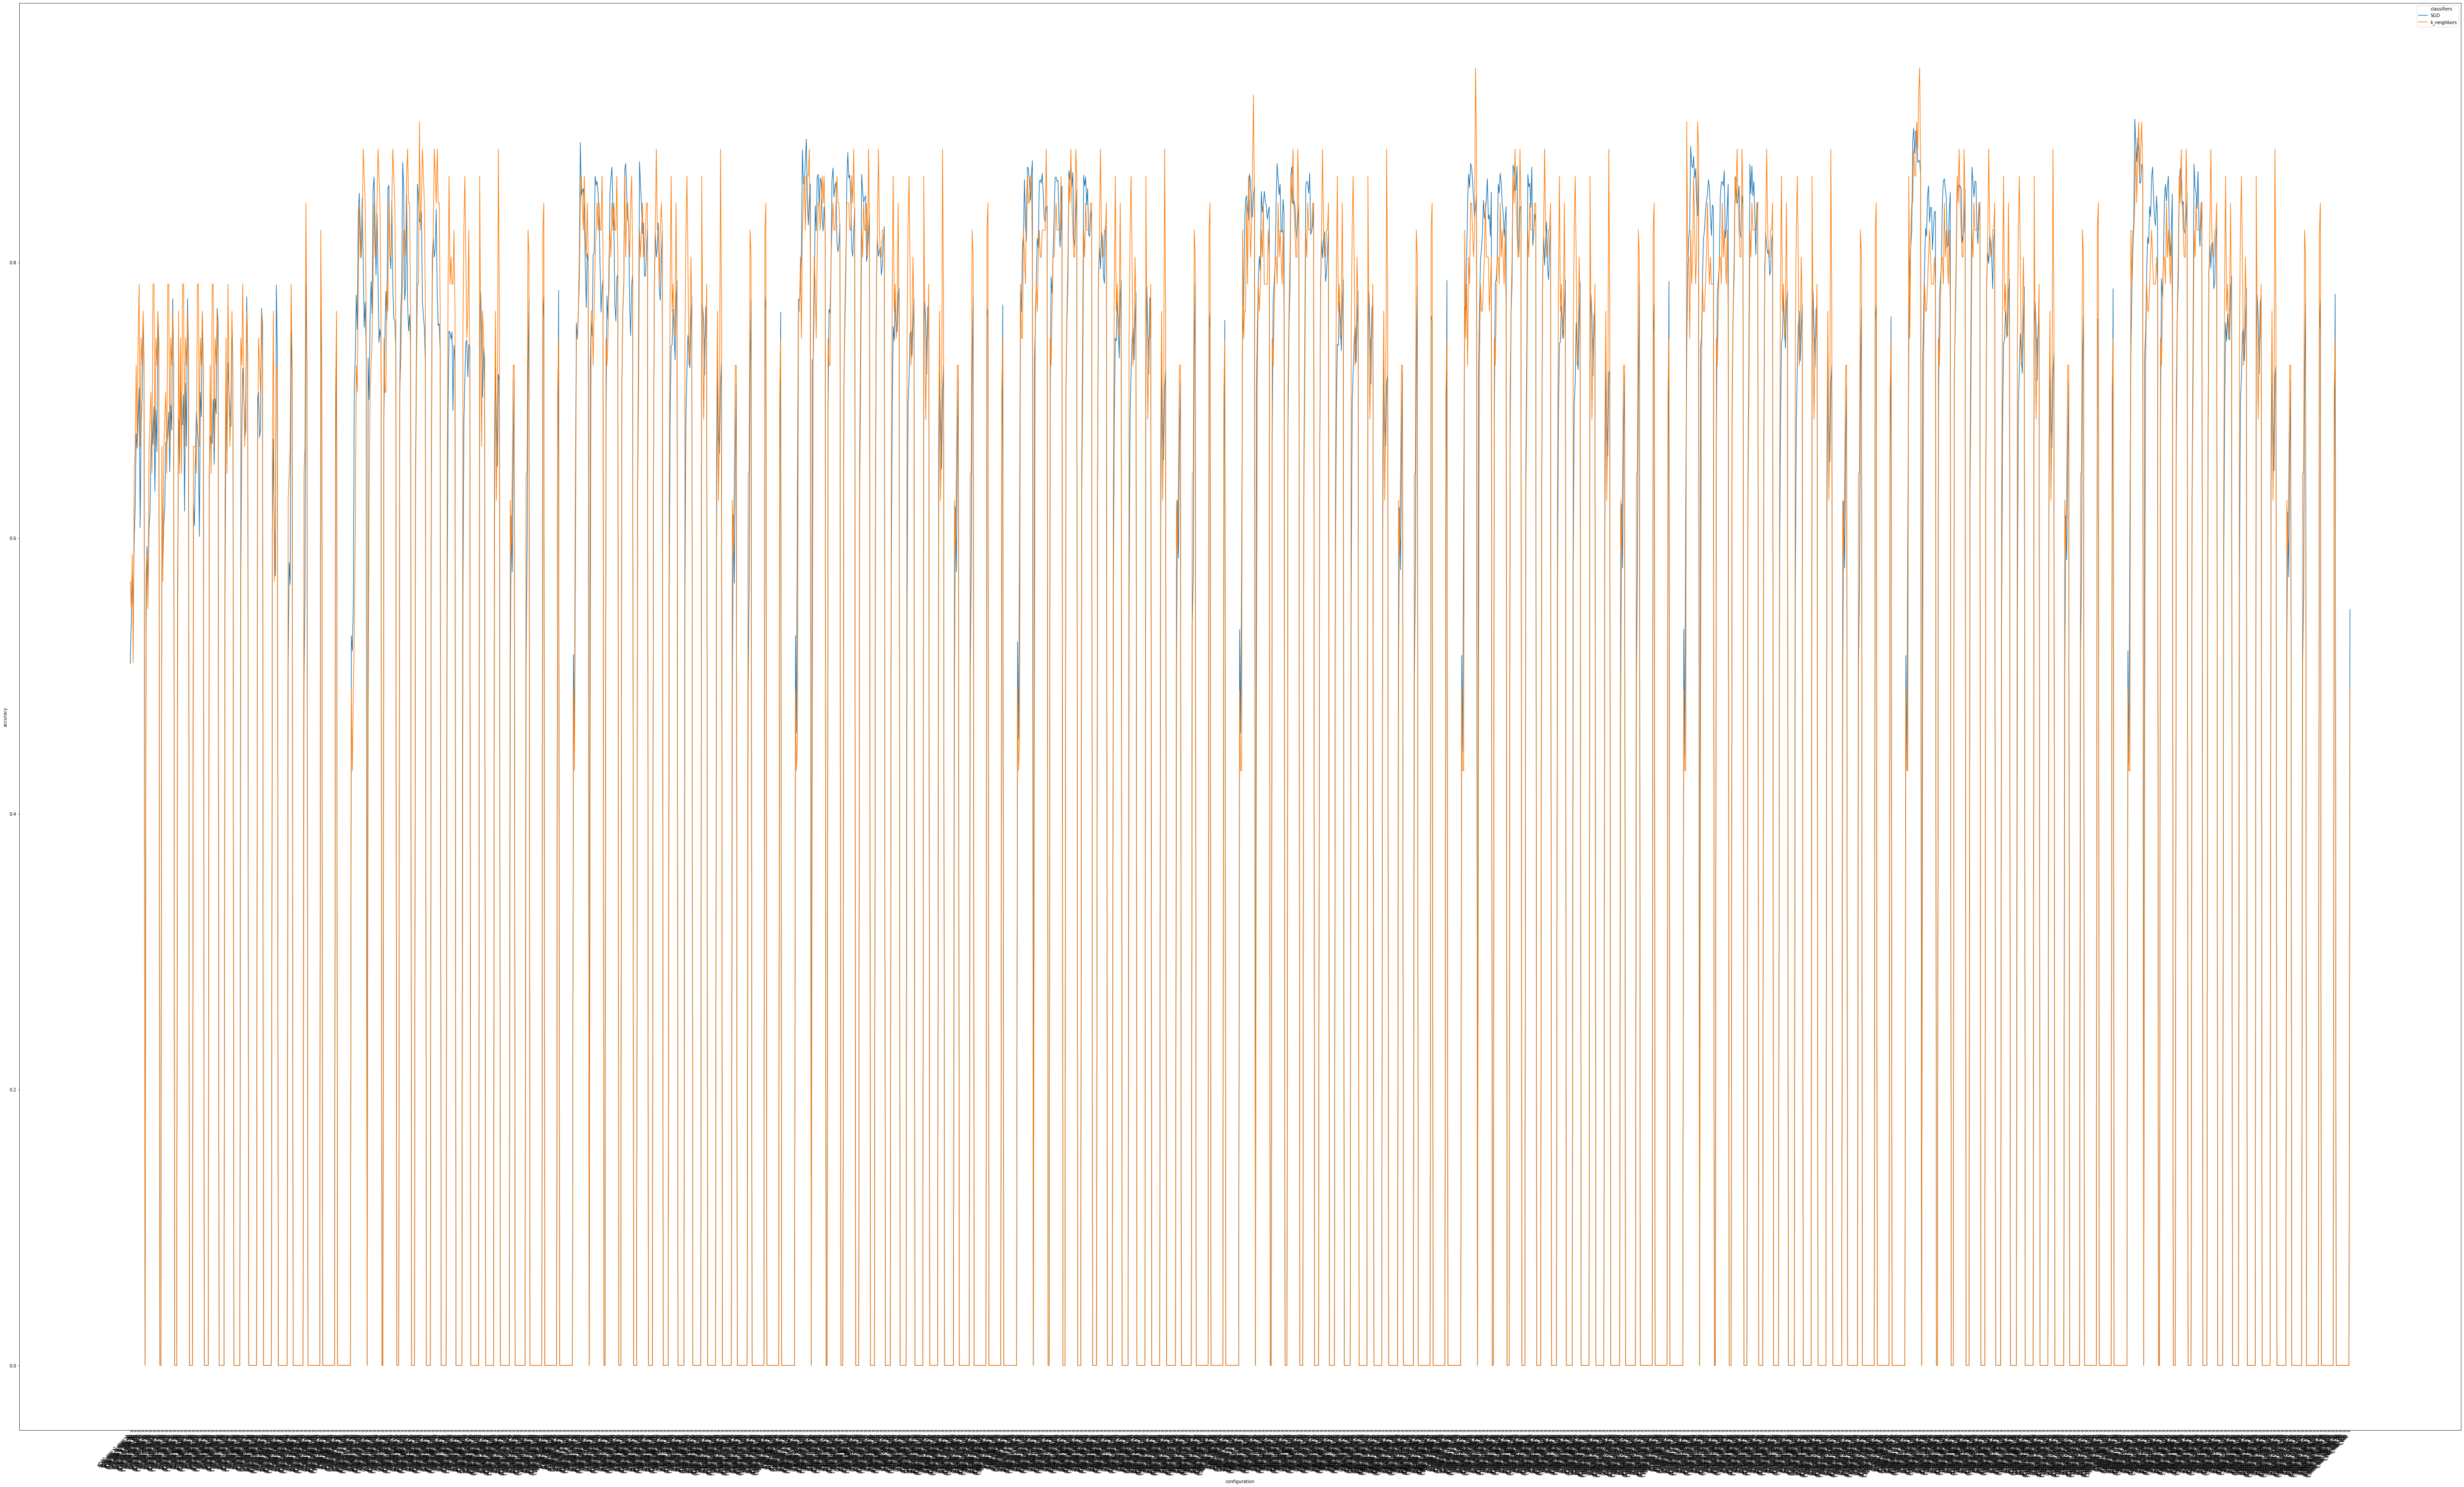

In [167]:
plt.figure(figsize=(100,60))
copy_df6 = df_6
dt_6 = copy_df6.melt('configuration', var_name='classifiers', value_name='accuracy')
g = sns.lineplot(x='configuration',y='accuracy',hue='classifiers',data=dt_6, sort=False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

In [175]:
print(df_6)
df_7.to_excel("output.xlsx") 
data = {}


               configuration       SGD  k_neighbors
0           f_10_min_1_max_1  0.509150     0.568627
1          f_10_min_1_max_10  0.539216     0.549020
2          f_10_min_1_max_20  0.575163     0.588235
3          f_10_min_1_max_30  0.552288     0.509804
4          f_10_min_1_max_40  0.598039     0.647059
...                      ...       ...          ...
2245  f_5000_min_140_max_100  0.000000     0.000000
2246  f_5000_min_140_max_110  0.000000     0.000000
2247  f_5000_min_140_max_120  0.000000     0.000000
2248  f_5000_min_140_max_130  0.000000     0.000000
2249  f_5000_min_140_max_140  0.548366     0.490196

[2250 rows x 3 columns]


#### 2.2 Modify the parameter max_features, percentage in min_df and percentage in max_df

In [168]:
data = {}

classifiers = {
    'SGD': SGDClassifier,
    'k_neighbors': KNeighborsClassifier}

features = [10,100,200,300,500,800,1000,1200,2000,5000]
df = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#Step 1: set experiment configuration as dataframe index
for num in features:
    for min_df in df:
        for max_df in df:
            #Add configuration to data_frame
            column_name = 'f_'+str(num)+'_min_'+str(min_df)+'_max_'+str(max_df)
            if not 'configuration' in data:
                data['configuration'] = []
            data['configuration'].append(column_name)
    
    
#Step 2: find data
for name_classifier in classifiers:    
    print(data)
    print ('----------------------------------')
    print ('Classifier: ' + name_classifier)
    classifier = classifiers[name_classifier]()
    
    for num in features:
        for min_df in df:
            for max_df in df:
        
                #TODO: can be replaced by a variable if we only care about mean
                #List meant to store all values for the same configuration
                list_num = []
            
                #TODO: Determine the number of repetitions per configuration, should we store the mean or median?
                for i in range(30):
        
                    try:
                        # Convert text to numbers and find TFIDF
                        tfidfconverter = TfidfVectorizer(max_features=num, min_df=min_df, max_df=max_df, stop_words=stopwords.words('english'))
                        x = tfidfconverter.fit_transform(documents).toarray()

                        # Select training and testing sets
                        # TODO: Should the division be random or the same number to make it reproducible?
                        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

                        # Train the classification model
                        classifier.fit(x_train, y_train)
                        y_pred = classifier.predict(x_test)

                        # Evaluate the model 
                        accuracy = accuracy_score(y_test, y_pred)
                        #print('max_features ' + str(num))
                        #print('min_df: ' +  str(min_df))
                        #print('max_df: ' +  str(max_df))
                        #print(confusion_matrix(y_test,y_pred))
                        #print(classification_report(y_test,y_pred))
                        #print(accuracy)

                    except Exception:
                        print('There was an error')
                        accuracy = 0
                        #print('max_features ' + str(num))
                        #print('min_df: ' +  str(min_df))
                        #print('max_df: ' +  str(max_df))

                    list_num.append(accuracy)
                    
                print('f_'+str(num)+'_min_'+str(min_df)+'_max_'+str(max_df))
                print(list_num)
        
                #Add data to column
                if not name_classifier in data:
                    data[name_classifier] = []
                data[name_classifier].append(mean(list_num))
                      
df_7 = pd.DataFrame(data)
print(df_7)

{'configuration': ['f_10_min_0.1_max_0.1', 'f_10_min_0.1_max_0.2', 'f_10_min_0.1_max_0.3', 'f_10_min_0.1_max_0.4', 'f_10_min_0.1_max_0.5', 'f_10_min_0.1_max_0.6', 'f_10_min_0.1_max_0.7', 'f_10_min_0.1_max_0.8', 'f_10_min_0.1_max_0.9', 'f_10_min_0.2_max_0.1', 'f_10_min_0.2_max_0.2', 'f_10_min_0.2_max_0.3', 'f_10_min_0.2_max_0.4', 'f_10_min_0.2_max_0.5', 'f_10_min_0.2_max_0.6', 'f_10_min_0.2_max_0.7', 'f_10_min_0.2_max_0.8', 'f_10_min_0.2_max_0.9', 'f_10_min_0.3_max_0.1', 'f_10_min_0.3_max_0.2', 'f_10_min_0.3_max_0.3', 'f_10_min_0.3_max_0.4', 'f_10_min_0.3_max_0.5', 'f_10_min_0.3_max_0.6', 'f_10_min_0.3_max_0.7', 'f_10_min_0.3_max_0.8', 'f_10_min_0.3_max_0.9', 'f_10_min_0.4_max_0.1', 'f_10_min_0.4_max_0.2', 'f_10_min_0.4_max_0.3', 'f_10_min_0.4_max_0.4', 'f_10_min_0.4_max_0.5', 'f_10_min_0.4_max_0.6', 'f_10_min_0.4_max_0.7', 'f_10_min_0.4_max_0.8', 'f_10_min_0.4_max_0.9', 'f_10_min_0.5_max_0.1', 'f_10_min_0.5_max_0.2', 'f_10_min_0.5_max_0.3', 'f_10_min_0.5_max_0.4', 'f_10_min_0.5_max_0.5

f_10_min_0.1_max_0.1
[0.6274509803921569, 0.6274509803921569, 0.5882352941176471, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.5882352941176471, 0.5686274509803921, 0.5882352941176471, 0.6078431372549019, 0.5882352941176471, 0.5882352941176471, 0.6078431372549019, 0.5882352941176471, 0.6078431372549019, 0.6078431372549019, 0.5490196078431373, 0.6078431372549019, 0.6274509803921569, 0.6078431372549019, 0.5686274509803921, 0.6078431372549019, 0.6078431372549019, 0.5686274509803921, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.6078431372549019, 0.6078431372549019]
f_10_min_0.1_max_0.2
[0.6078431372549019, 0.6274509803921569, 0.6274509803921569, 0.7058823529411765, 0.6470588235294118, 0.5686274509803921, 0.6862745098039216, 0.5686274509803921, 0.6862745098039216, 0.5686274509803921, 0.6862745098039216, 0.5686274509803921, 0.6862745098039216, 0.5686274509803921, 0.6666666666666666, 0.5686274509803921, 0.7058823529411765, 0.66666666666666

f_10_min_0.2_max_0.6
[0.7647058823529411, 0.7058823529411765, 0.5882352941176471, 0.7843137254901961, 0.7450980392156863, 0.6862745098039216, 0.5490196078431373, 0.7254901960784313, 0.5490196078431373, 0.6078431372549019, 0.5686274509803921, 0.7450980392156863, 0.7450980392156863, 0.6470588235294118, 0.6274509803921569, 0.7254901960784313, 0.5882352941176471, 0.5686274509803921, 0.7450980392156863, 0.47058823529411764, 0.5686274509803921, 0.5686274509803921, 0.45098039215686275, 0.7647058823529411, 0.7254901960784313, 0.5686274509803921, 0.7058823529411765, 0.5686274509803921, 0.7058823529411765, 0.5686274509803921]
f_10_min_0.2_max_0.7
[0.7058823529411765, 0.7058823529411765, 0.7647058823529411, 0.5686274509803921, 0.7254901960784313, 0.6666666666666666, 0.7843137254901961, 0.6274509803921569, 0.8431372549019608, 0.6078431372549019, 0.6274509803921569, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.6862745098039216, 0.7058823529411765, 0.6666666666666666, 0.725490196078

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_0.4_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_0.5_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_10_min_0.5_max_0.5
[0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921]
f_10_min_0.5_max_0.6
[0.7843137254901961, 0.7450980392156863, 0.6470

f_10_min_0.6_max_0.9
[0.7058823529411765, 0.7647058823529411, 0.5490196078431373, 0.7450980392156863, 0.5686274509803921, 0.7843137254901961, 0.6666666666666666, 0.6862745098039216, 0.7843137254901961, 0.6666666666666666, 0.6666666666666666, 0.7254901960784313, 0.6862745098039216, 0.6862745098039216, 0.7254901960784313, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.5882352941176471, 0.7058823529411765, 0.6470588235294118, 0.5882352941176471, 0.5882352941176471, 0.7254901960784313, 0.6862745098039216, 0.7254901960784313, 0.6862745098039216, 0.7450980392156863, 0.6470588235294118, 0.7254901960784313]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an erro

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_0.8_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_0.9_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_0.9_max_0.7
[0, 0, 0, 0,

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_0.2_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_100_min_0.2_max_0.2
[0.6078431372549019, 0.6470588235294118, 0.6470588235294118, 0.6274509803921569, 0.6470588235294118, 0.5686274509803921, 0.6470588235294118, 0.6470588235294118, 0.5882352941176471, 0.6470588235294118, 0.6078431372549019, 0.6862745098039216, 0.6666666666666666, 0.6274509803921569, 0.6274509803921569, 0.6078431372549019, 0.5490196078431373, 0.6078431372549019, 0.6666666666666666, 0.5882352941176471, 0.5882352941176471, 0.6274509803921569, 0.6078431372549019, 0.6274509803921569, 0.6666666666666666, 0.7

f_100_min_0.3_max_0.6
[0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.7843137254901961, 0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.8627450980392157, 0.8235294117647058, 0.7843137254901961, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.7843137254901961, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.7843137254901961, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058]
f_100_min_0.3_max_0.7
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.803921568627451, 0.7647058823529411, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961,

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_0.5_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_0.6_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_0.6_max_0.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0

There was an error
There was an error
f_100_min_0.7_max_0.7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_100_min_0.7_max_0.8
[0.7843137254901961, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.6470588235294118, 0.7450980392156863, 0.7450980392156863, 0.6862745098039216, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.6078431372549019, 0.7843137254901961, 0.7843137254901961, 0.8235294117647058, 0.7450980392156863, 0.803921568627451, 0.7450980392156863, 0.6666666666666666, 0.7647058823529411, 0.6666666666666666, 0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.6274509803921569, 0.5490196078431373]
f_100_min_0.7_max_0.9
[0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.7647058823529411, 0.7647058823529411, 0.803921568627451, 0.8235294117647058, 0.7843137254901961, 0.8235294117647058, 0.74509

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_0.9_max_0.2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

f_200_min_0.1_max_0.6
[0.8627450980392157, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.8431372549019608, 0.7843137254901961, 0.8235294117647058, 0.8431372549019608, 0.8627450980392157, 0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.7450980392156863, 0.7843137254901961, 0.8627450980392157, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.8627450980392157, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.803921568627451, 0.803921568627451, 0.7843137254901961, 0.8431372549019608, 0.7647058823529411, 0.8431372549019608]
f_200_min_0.1_max_0.7
[0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7843137254901961, 0.7254901960784313, 0.7254901960784313, 0.7843137254901961, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411, 0.7254901960784313, 0.7843137254901961, 0.7058823529411765, 0.7647058823529411, 0.7450980392156863, 0

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_0.3_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

f_200_min_0.4_max_0.5
[0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.6862745098039216, 0.6666666666666666, 0.7254901960784313, 0.6862745098039216, 0.7450980392156863, 0.6862745098039216, 0.7254901960784313, 0.7058823529411765, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6666666666666666, 0.6862745098039216, 0.7058823529411765, 0.6862745098039216, 0.7058823529411765, 0.7058823529411765, 0.6666666666666666, 0.7254901960784313, 0.7058823529411765, 0.6862745098039216, 0.7254901960784313, 0.7058823529411765, 0.7058823529411765, 0.6470588235294118, 0.7254901960784313, 0.7254901960784313]
f_200_min_0.4_max_0.6
[0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.803921568627451, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7647058823529

f_200_min_0.5_max_0.9
[0.6862745098039216, 0.7647058823529411, 0.7647058823529411, 0.7058823529411765, 0.7254901960784313, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.6862745098039216, 0.7450980392156863, 0.7058823529411765, 0.6666666666666666, 0.7058823529411765, 0.7058823529411765, 0.7254901960784313, 0.7058823529411765, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.6862745098039216, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.6862745098039216, 0.7647058823529411, 0.6862745098039216, 0.7647058823529411, 0.7058823529411765]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_0.7_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_0.7_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_0.8_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_0.8_max_0.7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an e

f_300_min_0.1_max_0.1
[0.7254901960784313, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.7058823529411765, 0.6862745098039216, 0.7058823529411765, 0.7058823529411765, 0.7254901960784313, 0.6862745098039216, 0.7058823529411765, 0.6862745098039216, 0.6666666666666666, 0.7058823529411765, 0.6862745098039216, 0.7058823529411765, 0.5686274509803921, 0.6470588235294118, 0.7058823529411765, 0.6862745098039216, 0.7254901960784313, 0.7058823529411765, 0.6862745098039216, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313]
f_300_min_0.1_max_0.2
[0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.7254901960784313, 0.6862745098039216, 0.7254901960784313, 0.7254901960784313, 0.7843137254901961, 0.7058823529411765, 0.7843137254901961, 0.7254901960784313, 0.7254901960784313, 0.7647058823529411, 0.7058823529411765, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.784313725490

f_300_min_0.2_max_0.6
[0.8823529411764706, 0.7647058823529411, 0.8627450980392157, 0.8431372549019608, 0.8431372549019608, 0.7843137254901961, 0.8823529411764706, 0.8431372549019608, 0.8823529411764706, 0.8235294117647058, 0.8235294117647058, 0.9215686274509803, 0.8627450980392157, 0.8235294117647058, 0.8627450980392157, 0.8627450980392157, 0.9019607843137255, 0.8431372549019608, 0.8823529411764706, 0.8235294117647058, 0.8823529411764706, 0.9019607843137255, 0.8627450980392157, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8235294117647058, 0.8823529411764706, 0.8431372549019608, 0.9215686274509803]
f_300_min_0.2_max_0.7
[0.8823529411764706, 0.7843137254901961, 0.8627450980392157, 0.8431372549019608, 0.8823529411764706, 0.803921568627451, 0.8823529411764706, 0.8431372549019608, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8431372549019608, 0.8823529411764706, 0.8823529411764706, 0.862745098039215

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_0.4_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_0.5_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_300_min_0.5_max_0.5
[0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.43137254901960786, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921]
f_300_min_0.5_max_0.6
[0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.745

f_300_min_0.6_max_0.9
[0.7254901960784313, 0.7058823529411765, 0.7058823529411765, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411, 0.6666666666666666, 0.7254901960784313, 0.6078431372549019, 0.6862745098039216, 0.7254901960784313, 0.6862745098039216, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.6862745098039216, 0.7058823529411765, 0.6862745098039216, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7647058823529411]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_0.8_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_0.9_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_0.9_max_0.7
[0, 0, 0, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_0.2_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_500_min_0.2_max_0.2
[0.6470588235294118, 0.6078431372549019, 0.6470588235294118, 0.6274509803921569, 0.6470588235294118, 0.6078431372549019, 0.6470588235294118, 0.6666666666666666, 0.6274509803921569, 0.6274509803921569, 0.6078431372549019, 0.6274509803921569, 0.6274509803921569, 0.6666666666666666, 0.6078431372549019, 0.5882352941176471, 0.5490196078431373, 0.6470588235294118, 0.6078431372549019, 0.6078431372549019, 0.6666666666666666, 0.6470588235294118, 0.6470588235294118, 0.6274509803921569, 0.5686274509803921, 0.6

f_500_min_0.3_max_0.6
[0.8627450980392157, 0.8235294117647058, 0.803921568627451, 0.7450980392156863, 0.803921568627451, 0.8235294117647058, 0.7843137254901961, 0.8627450980392157, 0.7647058823529411, 0.7843137254901961, 0.8235294117647058, 0.7843137254901961, 0.8627450980392157, 0.7843137254901961, 0.8431372549019608, 0.8431372549019608, 0.803921568627451, 0.7450980392156863, 0.7254901960784313, 0.8235294117647058, 0.7450980392156863, 0.803921568627451, 0.7647058823529411, 0.8627450980392157, 0.7843137254901961, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.7647058823529411]
f_500_min_0.3_max_0.7
[0.7843137254901961, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7058823529411765, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.803921568627451, 0.7254901960784313, 0.7647058823529411, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7450980392156863, 0.7843137254901961, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_0.5_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_0.6_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_0.6_max_0.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0

There was an error
There was an error
f_500_min_0.7_max_0.7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_500_min_0.7_max_0.8
[0.7843137254901961, 0.6274509803921569, 0.6666666666666666, 0.7647058823529411, 0.7843137254901961, 0.7450980392156863, 0.7254901960784313, 0.7843137254901961, 0.7843137254901961, 0.6666666666666666, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.8235294117647058, 0.6862745098039216, 0.8431372549019608, 0.7450980392156863, 0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.7647058823529411, 0.6470588235294118, 0.7254901960784313, 0.7843137254901961, 0.803921568627451, 0.7647058823529411, 0.7843137254901961, 0.7058823529411765, 0.7450980392156863]
f_500_min_0.7_max_0.9
[0.8235294117647058, 0.7843137254901961, 0.8235294117647058, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8235294117647058, 0.7647058823

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_0.9_max_0.2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

f_800_min_0.1_max_0.6
[0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.8627450980392157, 0.8627450980392157, 0.8235294117647058, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.8627450980392157, 0.7450980392156863, 0.8627450980392157, 0.8627450980392157, 0.8823529411764706, 0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.7058823529411765, 0.8431372549019608, 0.8235294117647058, 0.8235294117647058, 0.8431372549019608, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.8235294117647058]
f_800_min_0.1_max_0.7
[0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.7450980392156863, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.8431372549019608, 0.8431372549019608, 0.6274509803921569, 0.8235294117647058, 0.7647058823529411, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_0.3_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

f_800_min_0.4_max_0.5
[0.6862745098039216, 0.6666666666666666, 0.7254901960784313, 0.7058823529411765, 0.7254901960784313, 0.6666666666666666, 0.6666666666666666, 0.6470588235294118, 0.7058823529411765, 0.7058823529411765, 0.6666666666666666, 0.6862745098039216, 0.6470588235294118, 0.7254901960784313, 0.6666666666666666, 0.7058823529411765, 0.7254901960784313, 0.6862745098039216, 0.6274509803921569, 0.6862745098039216, 0.6862745098039216, 0.6666666666666666, 0.7058823529411765, 0.6666666666666666, 0.7058823529411765, 0.6862745098039216, 0.7058823529411765, 0.7254901960784313, 0.7058823529411765, 0.6862745098039216]
f_800_min_0.4_max_0.6
[0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7058823529411765, 0.6666666666666666, 0.7058823529411765, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.705882352941

f_800_min_0.5_max_0.9
[0.7647058823529411, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7058823529411765, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7450980392156863, 0.6862745098039216, 0.7058823529411765, 0.7647058823529411, 0.7450980392156863, 0.7058823529411765, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7647058823529411, 0.7058823529411765, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7058823529411765, 0.7647058823529411, 0.7647058823529411, 0.7254901960784313, 0.7254901960784313]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_0.7_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_0.7_max_0.4
[0, 0, 0, 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_0.8_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_0.8_max_0.7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an e

f_1000_min_0.1_max_0.1
[0.7058823529411765, 0.7058823529411765, 0.6862745098039216, 0.7058823529411765, 0.6274509803921569, 0.6862745098039216, 0.7254901960784313, 0.7058823529411765, 0.6666666666666666, 0.7450980392156863, 0.7254901960784313, 0.6862745098039216, 0.7254901960784313, 0.7254901960784313, 0.7450980392156863, 0.7058823529411765, 0.7058823529411765, 0.7254901960784313, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.7058823529411765, 0.7254901960784313, 0.7254901960784313, 0.6862745098039216, 0.7058823529411765, 0.7254901960784313, 0.6666666666666666, 0.6666666666666666, 0.7254901960784313]
f_1000_min_0.1_max_0.2
[0.803921568627451, 0.6666666666666666, 0.7058823529411765, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7254901960784313, 0.8235294117647058, 0.7450980392156863, 0.7254901960784313, 0.803921568627451, 0.7647058823529411, 0.7647058823529411, 0.764705882352

f_1000_min_0.2_max_0.6
[0.8823529411764706, 0.8823529411764706, 0.8627450980392157, 0.8627450980392157, 0.8823529411764706, 0.9019607843137255, 0.8431372549019608, 0.9019607843137255, 0.8627450980392157, 0.8823529411764706, 0.803921568627451, 0.8431372549019608, 0.8627450980392157, 0.8235294117647058, 0.8627450980392157, 0.9019607843137255, 0.8235294117647058, 0.8823529411764706, 0.8235294117647058, 0.7647058823529411, 0.8235294117647058, 0.8627450980392157, 0.9215686274509803, 0.8823529411764706, 0.9215686274509803, 0.8431372549019608, 0.9411764705882353, 0.8431372549019608, 0.9019607843137255, 0.9019607843137255]
f_1000_min_0.2_max_0.7
[0.7450980392156863, 0.8235294117647058, 0.7843137254901961, 0.8235294117647058, 0.7843137254901961, 0.8431372549019608, 0.8627450980392157, 0.8431372549019608, 0.7843137254901961, 0.8431372549019608, 0.7647058823529411, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8627450980392157, 0.74509803921

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_0.4_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_0.5_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_1000_min_0.5_max_0.5
[0.43137254901960786, 0.5686274509803921, 0.43137254901960786, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.43137254901960786, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921]
f_1000_min_0.5_max_0.6
[0.7647058823529411, 0.7647058823529411

f_1000_min_0.6_max_0.9
[0.7058823529411765, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.7058823529411765, 0.7254901960784313, 0.6862745098039216, 0.7058823529411765, 0.7450980392156863, 0.6666666666666666, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7450980392156863, 0.7058823529411765, 0.7450980392156863, 0.7058823529411765, 0.7647058823529411, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.6862745098039216, 0.7450980392156863, 0.7254901960784313, 0.7254901960784313, 0.6862745098039216, 0.7058823529411765]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_0.8_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_0.9_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_0.2_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_1200_min_0.2_max_0.2
[0.6078431372549019, 0.6470588235294118, 0.6078431372549019, 0.6470588235294118, 0.6470588235294118, 0.6274509803921569, 0.6078431372549019, 0.6274509803921569, 0.6078431372549019, 0.6274509803921569, 0.6470588235294118, 0.6078431372549019, 0.6470588235294118, 0.6274509803921569, 0.6470588235294118, 0.6666666666666666, 0.6666666666666666, 0.6274509803921569, 0.5686274509803921, 0.6274509803921569, 0.6666666666666666, 0.6470588235294118, 0.6470588235294118, 0.6

f_1200_min_0.3_max_0.6
[0.7647058823529411, 0.8431372549019608, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.7647058823529411, 0.8431372549019608, 0.8235294117647058, 0.803921568627451, 0.7450980392156863, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.803921568627451, 0.8431372549019608, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.7843137254901961, 0.7647058823529411, 0.8235294117647058, 0.7450980392156863, 0.8431372549019608, 0.8235294117647058, 0.8431372549019608]
f_1200_min_0.3_max_0.7
[0.7843137254901961, 0.7450980392156863, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.8235294117647058, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.803921568627451, 0.8235294117647058, 0.7843137254901961, 0.8431372549019608, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.7254901960784313, 0

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_0.5_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_0.6_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_0.6_max_0.5
[0, 0, 0

There was an error
There was an error
There was an error
f_1200_min_0.7_max_0.7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_1200_min_0.7_max_0.8
[0.803921568627451, 0.7843137254901961, 0.7450980392156863, 0.7647058823529411, 0.7647058823529411, 0.8235294117647058, 0.7450980392156863, 0.7843137254901961, 0.7254901960784313, 0.7843137254901961, 0.8235294117647058, 0.7843137254901961, 0.6862745098039216, 0.7647058823529411, 0.7843137254901961, 0.7647058823529411, 0.7254901960784313, 0.7647058823529411, 0.7843137254901961, 0.803921568627451, 0.7843137254901961, 0.6078431372549019, 0.7647058823529411, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.7843137254901961, 0.803921568627451, 0.7058823529411765]
f_1200_min_0.7_max_0.9
[0.803921568627451, 0.7843137254901961, 0.7647058823529411, 0.8431372549019608, 0.8431372549019608, 0.803921568627451, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.72549

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_0.9_max_0.2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

f_2000_min_0.1_max_0.6
[0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8627450980392157, 0.7254901960784313, 0.9215686274509803, 0.9019607843137255, 0.8627450980392157, 0.8627450980392157, 0.8823529411764706, 0.8235294117647058, 0.8627450980392157, 0.9215686274509803, 0.7647058823529411, 0.8235294117647058, 0.8431372549019608, 0.803921568627451, 0.803921568627451, 0.7647058823529411, 0.8431372549019608, 0.7843137254901961, 0.8823529411764706, 0.8235294117647058, 0.803921568627451, 0.7843137254901961, 0.8431372549019608, 0.8627450980392157, 0.8627450980392157]
f_2000_min_0.1_max_0.7
[0.8627450980392157, 0.8235294117647058, 0.7647058823529411, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0.803921568627451, 0.8235294117647058, 0

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_0.3_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

f_2000_min_0.4_max_0.5
[0.6470588235294118, 0.7450980392156863, 0.7058823529411765, 0.6862745098039216, 0.7254901960784313, 0.6862745098039216, 0.7254901960784313, 0.7058823529411765, 0.7254901960784313, 0.6862745098039216, 0.6666666666666666, 0.6862745098039216, 0.6862745098039216, 0.7058823529411765, 0.6862745098039216, 0.7254901960784313, 0.7450980392156863, 0.6862745098039216, 0.6862745098039216, 0.7058823529411765, 0.6862745098039216, 0.6862745098039216, 0.7058823529411765, 0.7058823529411765, 0.7254901960784313, 0.6862745098039216, 0.7254901960784313, 0.6470588235294118, 0.7058823529411765, 0.6666666666666666]
f_2000_min_0.4_max_0.6
[0.7647058823529411, 0.7843137254901961, 0.7254901960784313, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.803921568627451, 0.7450980392156863, 0.7450980392156863, 0.7254901960784313, 0.6862745098039216, 0.7254901960784313, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.74509803921

f_2000_min_0.5_max_0.9
[0.7254901960784313, 0.7647058823529411, 0.7058823529411765, 0.7450980392156863, 0.7450980392156863, 0.6862745098039216, 0.6862745098039216, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7450980392156863, 0.7058823529411765, 0.6862745098039216, 0.7058823529411765, 0.7843137254901961, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.7647058823529411, 0.7647058823529411, 0.7254901960784313, 0.7058823529411765, 0.7647058823529411, 0.7647058823529411, 0.6666666666666666, 0.6862745098039216, 0.7254901960784313, 0.7843137254901961, 0.7647058823529411, 0.7254901960784313]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_0.7_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_0.7_max_0.4
[0, 0, 0

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_0.8_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_0.8_max_0.7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an

f_5000_min_0.1_max_0.1
[0.7058823529411765, 0.6666666666666666, 0.7058823529411765, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.7058823529411765, 0.6666666666666666, 0.7058823529411765, 0.6862745098039216, 0.6666666666666666, 0.7254901960784313, 0.6666666666666666, 0.6470588235294118, 0.7058823529411765, 0.6862745098039216, 0.6862745098039216, 0.7058823529411765, 0.7254901960784313, 0.7058823529411765, 0.7450980392156863, 0.6862745098039216, 0.7647058823529411, 0.6274509803921569, 0.6862745098039216, 0.7254901960784313, 0.7450980392156863, 0.7058823529411765, 0.6862745098039216, 0.7254901960784313]
f_5000_min_0.1_max_0.2
[0.7843137254901961, 0.7058823529411765, 0.7450980392156863, 0.6862745098039216, 0.7254901960784313, 0.7254901960784313, 0.7843137254901961, 0.7647058823529411, 0.803921568627451, 0.8235294117647058, 0.7450980392156863, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7843137254901961, 0.7450980392156863, 0.7254901960784313, 0.76470588235

f_5000_min_0.2_max_0.6
[0.8627450980392157, 0.8823529411764706, 0.7450980392156863, 0.8431372549019608, 0.9019607843137255, 0.9019607843137255, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8823529411764706, 0.8235294117647058, 0.7843137254901961, 0.803921568627451, 0.8627450980392157, 0.8627450980392157, 0.7647058823529411, 0.9019607843137255, 0.8627450980392157, 0.8823529411764706, 0.8431372549019608, 0.8627450980392157, 0.7843137254901961, 0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.803921568627451, 0.8823529411764706, 0.9019607843137255, 0.8431372549019608, 0.7450980392156863]
f_5000_min_0.2_max_0.7
[0.8431372549019608, 0.803921568627451, 0.8627450980392157, 0.8431372549019608, 0.8627450980392157, 0.8235294117647058, 0.803921568627451, 0.8627450980392157, 0.803921568627451, 0.803921568627451, 0.8627450980392157, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.803921568627451, 0.803921568627451, 0.8431372549019608, 0.8627450980392157, 0.8

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_0.4_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_0.5_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_5000_min_0.5_max_0.5
[0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.43137254901960786, 0.5686274509803921, 0.43137254901960786, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.43137254901960786, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921]
f_5000_min_0.5_max_0.6
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411,

f_5000_min_0.6_max_0.9
[0.7058823529411765, 0.7058823529411765, 0.7254901960784313, 0.7254901960784313, 0.7647058823529411, 0.7450980392156863, 0.7254901960784313, 0.7450980392156863, 0.7058823529411765, 0.7450980392156863, 0.7058823529411765, 0.7450980392156863, 0.7254901960784313, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7450980392156863, 0.6666666666666666, 0.7843137254901961, 0.7450980392156863, 0.7058823529411765, 0.7450980392156863, 0.803921568627451, 0.7058823529411765, 0.7254901960784313, 0.7450980392156863, 0.6274509803921569, 0.7254901960784313, 0.7254901960784313]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_0.8_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_0.9_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

f_10_min_0.1_max_0.1
[0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019, 0.6078431372549019]
f_10_min_0.1_max_0.2
[0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.70588235294117

f_10_min_0.2_max_0.6
[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
f_10_min_0.2_max_0.7
[0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.7254901960784313, 0.72549019607843

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_0.4_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_0.5_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_10_min_0.5_max_0.5
[0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921]
f_10_min_0.5_max_0.6
[0.74509803921568

f_10_min_0.6_max_0.9
[0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an erro

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_0.8_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an e

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_0.9_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_10_min_0.9_m

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_0.2_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_100_min_0.2_max_0.2
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.

f_100_min_0.3_max_0.6
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_100_min_0.3_max_0.7
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.823529411764

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_0.5_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_0.6_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_0.6_max_0.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

f_100_min_0.7_max_0.8
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_100_min_0.7_max_0.9
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.8039215686

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_100_min_0.9_max_0.2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

f_200_min_0.1_max_0.6
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_200_min_0.1_max_0.7
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.823529411764

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_0.3_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

f_200_min_0.4_max_0.5
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_200_min_0.4_max_0.6
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.82

f_200_min_0.5_max_0.9
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_0.7_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_0.7_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_0.8_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_200_min_0.8_max_0.7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an e

f_300_min_0.1_max_0.1
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569]
f_300_min_0.1_max_0.2
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.764705882352

f_300_min_0.2_max_0.6
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_300_min_0.2_max_0.7
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.823529411764

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_0.4_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_0.5_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_300_min_0.5_max_0.5
[0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921]
f_300_min_0.5_max_0.6
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.76470588

f_300_min_0.6_max_0.9
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_0.8_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_0.9_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_300_min_0.9

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_0.2_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_500_min_0.2_max_0.2
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569,

f_500_min_0.3_max_0.6
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_500_min_0.3_max_0.7
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.823529411764

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_0.5_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_0.6_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_0.6_max_0.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0

There was an error
f_500_min_0.7_max_0.7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_500_min_0.7_max_0.8
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_500_min_0.7_max_0.9
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.80392156862

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_500_min_0.9_max_0.2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

f_800_min_0.1_max_0.6
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_800_min_0.1_max_0.7
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.78

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_0.3_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an 

f_800_min_0.4_max_0.5
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_800_min_0.4_max_0.6
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.82

f_800_min_0.5_max_0.9
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an err

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_0.7_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_0.7_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_0.8_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_800_min_0.8_max_0.7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an e

f_1000_min_0.1_max_0.1
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569]
f_1000_min_0.1_max_0.2
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392

f_1000_min_0.2_max_0.6
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_1000_min_0.2_max_0.7
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_0.4_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_0.5_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_1000_min_0.5_max_0.5
[0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921]
f_1000_min_0.5_max_0.6
[0.7647058823529411, 0.7647058823529411, 0.764705

f_1000_min_0.6_max_0.9
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_0.8_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_0.9_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1000_min_0

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_0.2_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_1200_min_0.2_max_0.2
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 

f_1200_min_0.3_max_0.6
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_1200_min_0.3_max_0.7
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_0.5_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_0.6_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_0.6_max_0.5
[0, 0, 0

There was an error
There was an error
There was an error
f_1200_min_0.7_max_0.7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_1200_min_0.7_max_0.8
[0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608, 0.8431372549019608]
f_1200_min_0.7_max_0.9
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.80392156

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_1200_min_0.9_max_0.2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

f_2000_min_0.1_max_0.6
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_2000_min_0.1_max_0.7
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_0.3_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

f_2000_min_0.4_max_0.5
[0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451, 0.803921568627451]
f_2000_min_0.4_max_0.6
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.

f_2000_min_0.5_max_0.9
[0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_0.7_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_0.7_max_0.4
[0, 0, 0

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_0.8_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_2000_min_0.8_max_0.7
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an

f_5000_min_0.1_max_0.1
[0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569]
f_5000_min_0.1_max_0.2
[0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392156863, 0.7450980392

f_5000_min_0.2_max_0.6
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
f_5000_min_0.2_max_0.7
[0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_0.4_max_0.1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_0.5_max_0.4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_5000_min_0.5_max_0.5
[0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921, 0.5686274509803921]
f_5000_min_0.5_max_0.6
[0.7647058823529411, 0.7647058823529411, 0.764705

f_5000_min_0.6_max_0.9
[0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961, 0.7843137254901961]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an er

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_0.8_max_0.3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an

There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_0.9_max_0.6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
There was an error
f_5000_min_0

In [179]:
data = {}

features = [10,100,200,300,500,800,1000,1200,2000,5000]
df = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

classifiers = ['SGD', 'k_neighbors']


for classifier in classifiers:    
    for num in features:
        for min_df in df:
            for max_df in df:
                
                if not 'classifier' in data:
                    data['classifier'] = []
                data['classifier'].append(classifier)
                
                if not 'max_features' in data:
                    data['max_features'] = []
                data['max_features'].append(num)
                
                if not 'min_df' in data:
                    data['min_df'] = []
                data['min_df'].append(min_df)
                
                if not 'max_df' in data:
                    data['max_df'] = []
                data['max_df'].append(max_df)
                
for classifier in classifiers:
    for value in df_7[classifier]:
        if not 'accuracy' in data:
            data['accuracy'] = []
        data['accuracy'].append(value)
        
                
                      
df_9 = pd.DataFrame(data)
df_9.to_excel("output_scatter_decimals.xlsx") 

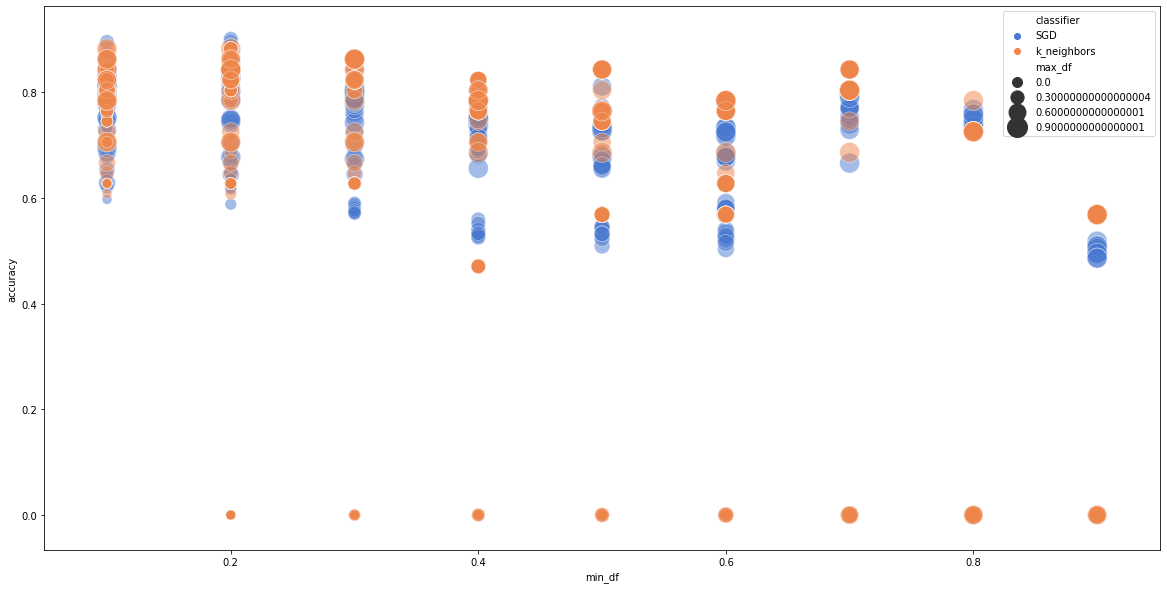

In [202]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_9, x="min_df", y='accuracy', hue = 'classifier', size='max_df', sizes=(100, 400), alpha=.5, palette="muted")